## Проект: вариант 3
Представьте, что вы работаете в крупном дейтинговом приложении.

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

#### Проверьте:

Был ли эксперимент успешен в целом.
*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

#### Данные
Всего есть три группы: 

тестовая (test)  
контрольная 1 (control_1)    
контрольная 2 (control_2) 

Для каждой из них:

##### users_*.csv – информация о пользователях:

- uid – идентификатор пользователя
- age – возраст
- attraction_coeff – коэффициент привлекательности (от 0 до 1000, лайки/просмотры∗1000)
- coins – число монеток (внутренняя валюта)
- country – страна  
- visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
- gender – пол
- age_filter_start  – фильтр поиска, мин. значение 
- age_filter_end  – фильтр поиска, макс. значение 
- views_count – число полученных оценок 
- was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный 

##### transactions_*.csv – информация о платежах пользователей:

- uid – идентификатор пользователя
- country – страна
- joined_at – дата и время регистрации
- paid_at – дата и время покупки
- revenue – нормированная выручка
- payment_id – идентификатор платежа
- from_page – откуда пользователь перешел на страницу оплаты
- product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial - премиум-подписка без пробной, coins - подписка за внутреннюю валюту, other_type - другое) 

##### Файлы:

- users_test – информация о пользователях в тестовой группе.
- users_control_1 – информация о пользователях в первой контрольной группе.
- users_control_2 – информация о пользователях во второй контрольной группе.
- transactions_test – информация о платежах пользователей в тестовой группе.
- transactions_control_1 – информация о платежах пользователей в первой контрольной группе.
- transactions_control_2 – информация о платежах пользователей во второй контрольной группе   

#### Порядок выполнения проекта:

1. Провести EDA для пользователей
2. Провести EDA для транзакций
3. Сделать выводы по EDA анализам
4. Подготовить данные для A/B- тестирования. (Рандомизация)  
   4.1. Возраст  
   4.2. Коэффициент привлекательности  
   4.3. Число монеток (внутренняя валюта)  
   4.4. Страна  
   4.5. Количество дней, проведенное пользователем в приложении   
   4.6. Пол пользователей  
   4.7. Фильтр поиска, мин. значение  
   4.8. Фильтр поиска, макс. значение  
   4.9. Число просмотров  
5. A/B тестирование
6. Вывод

Проведем импорт библиотек и подгрузку всех файлов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import scipy.stats as ss
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import mannwhitneyu

In [2]:
users_test=pd.read_csv('Проект_3_users_test.csv',sep=";")
users_control_1=pd.read_csv('Проект_3_users_control_1.csv',sep=";")
users_control_2=pd.read_csv('Проект_3_users_control_2.csv',sep=";")
transactions_test=pd.read_csv('Проект_3_transactions_test.csv',sep=";")
transactions_control_1=pd.read_csv('Проект_3_transactions_control_1.csv',sep=";")
transactions_control_2=pd.read_csv('Проект_3_transactions_control_2.csv',sep=";")

<h2>1. EDA пользователей</h2>

<h3>1.1. EDA users_test</h3>

In [3]:
users_test.head()

uid  age  attraction_coeff  coins                   country  \
0  892309896   27               685    NaN  United States of America   
1  892044516   27                 0    NaN                   Germany   
2  892185708   45                44    NaN                    Israel   
3  892130292   32                 0    NaN  United States of America   
4  891406035   27              1000    NaN                    France   

                                          visit_days  gender  \
0                   1,2,3,4,5,6,7,8,9,10,11,12,16,17       1   
1                                                NaN       1   
2  1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...       1   
3                         1,2,3,4,5,6,7,8,9,10,11,12       1   
4                                                NaN       1   

   age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                24              30           89          NaN         NaN   
1                24              30            0          NaN         NaN   
2                42              48           68          NaN         NaN   
3                29              35            0          NaN         NaN   
4                24              30            1          1.0         NaN   

   total_revenue  
0              0  
1              0  
2              0  
3              0  
4              0

In [4]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [5]:
users_test.shape

(4308, 13)

По полученным данным мы видим, что есть пропущенные значения в столбце coins. Я считаю это нормальным, поскольку у пользователя может не быть этой внутренней валюты (монеток).
Также значения пропущены в столбцах: visit_days, was_premium, is_premium

По условию мы знаем, что visit_days – это в какие дни ПОСЛЕ регистрации пользователь посещал приложение (напр. в 1, затем в 7). Можно считать, что пользователи с пропущенными значениями в vizit_days заходили в приложение только в день регистрации, а потом не заходили.

Сделаем преобразование данных: заменим пропуски во всех столбцах на 0

In [6]:
users_test=users_test.fillna(0)

In [7]:
users_test.isna().sum()

uid                 0
age                 0
attraction_coeff    0
coins               0
country             0
visit_days          0
gender              0
age_filter_start    0
age_filter_end      0
views_count         0
was_premium         0
is_premium          0
total_revenue       0
dtype: int64

In [8]:
users_test.describe()

uid          age  attraction_coeff        coins       gender  \
count  4.308000e+03  4308.000000       4308.000000  4308.000000  4308.000000   
mean   8.917437e+08    31.889276        316.411328     2.614206     0.953110   
std    4.547670e+05    10.245287        323.373725   129.608910     0.211427   
min    8.910511e+08    16.000000          0.000000     0.000000     0.000000   
25%    8.913621e+08    25.000000          0.000000     0.000000     1.000000   
50%    8.917290e+08    30.000000        250.000000     0.000000     1.000000   
75%    8.920952e+08    38.000000        520.250000     0.000000     1.000000   
max    9.051586e+08    99.000000       1000.000000  8466.000000     1.000000   

       age_filter_start  age_filter_end   views_count  was_premium  \
count       4308.000000     4308.000000   4308.000000  4308.000000   
mean          26.701486       38.248839     50.391133     0.094708   
std            9.390851       15.344562    318.676437     0.292845   
min           13.000000       19.000000      0.000000     0.000000   
25%           19.000000       28.000000      1.000000     0.000000   
50%           24.000000       35.000000      6.000000     0.000000   
75%           32.000000       44.000000     22.000000     0.000000   
max           96.000000      102.000000  12831.000000     1.000000   

        is_premium  total_revenue  
count  4308.000000    4308.000000  
mean      0.036444     534.080316  
std       0.187414    4371.682632  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.000000  
75%       0.000000       0.000000  
max       1.000000  129870.000000

In [9]:
(users_test.query('is_premium==1').uid.count()/users_test.uid.count()*100).round(2)

3.64

In [10]:
(users_test.query('was_premium==1').uid.count()/users_test.uid.count()*100).round(2)

9.47

In [11]:
total_revenue_test=users_test.total_revenue.sum()
total_revenue_test

2300818

В тестовой группе у нас получается 4308 пользователей.   
У тестовой группы средний возраст пользователей 32, медианный 30, максимальный 99 и минимальный 16.  
Средний коэффициент привлекательности получается 316, медианнный 250, масимальный 1000.  
Премиум-продписка есть у 3.64% пользователей.  
Когда-то был премиум был у 9.47% пользователей.  
Общая сумма выручки в этой группе: 2300818, среднее значение выручки: 534,08 Максимальное: 129870

Посмотрим у каких пользователей указана премиум-подписка, но нормированная выручка равнв 0

In [12]:
users_test.query('is_premium==1 & total_revenue==0')

uid  age  attraction_coeff   coins  \
205   891194670   38               583     0.0   
411   891129669   30               275     0.0   
420   891219834   21               333     0.0   
545   891154932   23               750     0.0   
881   891091278   26               645     0.0   
1277  891161214   43               377     0.0   
1348  891139608   37               571     0.0   
1711  891084531   20                 0     0.0   
1812  891208272   47               761     0.0   
1817  891229638   31                 0     0.0   
1861  891296772   32               500     0.0   
2179  891131145   30                 0     0.0   
2369  891083736   43               597     0.0   
2380  891402198   35                 0     0.0   
2400  891107397   37                 0     0.0   
2937  905158620   16               579  8466.0   
3285  891663135   35               666     0.0   
3420  891376497   39                 0     0.0   
3454  891101466   35                 0     0.0   
3671  891266700   23                 0     0.0   
3672  891181017   25               166     0.0   
3697  891739809   27               531     0.0   
3795  891140433   26                 0     0.0   
3826  891086826   36               272     0.0   
3840  891451263   37               547     0.0   
3896  891193689   32                 0     0.0   
4000  891078774   33              1000     0.0   
4001  891072834   27               642     0.0   
4053  891090924   40               262     0.0   
4112  891199041   42               686     0.0   
4194  891126594   22                 0     0.0   
4199  891199206   21               333     0.0   
4239  891061959   30               476     0.0   
4260  891071241   38               357     0.0   

                             country  \
205                          Germany   
411   United Kingdom (Great Britain)   
420         United States of America   
545             United Arab Emirates   
881             United Arab Emirates   
1277            United Arab Emirates   
1348        United States of America   
1711                       Australia   
1812        United States of America   
1817                          Canada   
1861                          France   
2179        United States of America   
2369        United States of America   
2380                         Germany   
2400        United States of America   
2937              Russian Federation   
3285                       Argentina   
3420                           Chile   
3454                           Chile   
3671                           Chile   
3672        United States of America   
3697            United Arab Emirates   
3795                          France   
3826                           Italy   
3840        United States of America   
3896                          Canada   
4000        United States of America   
4001            United Arab Emirates   
4053        United States of America   
4112        United States of America   
4194                          France   
4199        United States of America   
4239        United States of America   
4260            United Arab Emirates   

                                             visit_days  gender  \
205                                                 1,2       1   
411                                           1,2,3,4,5       1   
420                                                   0       1   
545                                                   0       1   
881                                             1,2,3,4       1   
1277                                      1,2,3,4,5,6,7       1   
1348                                                1,2       1   
1711                                                  1       1   
1812                                    1,2,3,4,5,6,7,8       1   
1817                                    1,2,3,4,5,6,7,8       1   
1861                                          1,3,4,5,6       1   
2179                                            2,4,5,6 

In [13]:
users_test.iloc[2937].visit_days

'1,2,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,26,27,28,29,30,60,90,120,150,180'

In [14]:
users_test_for_check_1=users_test.query('was_premium==1 & total_revenue==0')
users_test_for_check_1

uid  age  attraction_coeff  coins                   country  \
4     891406035   27              1000    0.0                    France   
13    891219699   30              1000    0.0  United States of America   
36    891348462   24               466    0.0  United States of America   
58    892433982   20               333    0.0  United States of America   
59    892140771   62               351    0.0                     Italy   
...         ...  ...               ...    ...                       ...   
4194  891126594   22                 0    0.0                    France   
4199  891199206   21               333    0.0  United States of America   
4239  891061959   30               476    0.0  United States of America   
4260  891071241   38               357    0.0      United Arab Emirates   
4296  891668115   22              1000    0.0                     Spain   

          visit_days  gender  age_filter_start  age_filter_end  views_count  \
4                  0       1                24              30            1   
13                 0       1                27              33            1   
36                 0       1                16              36           15   
58    1,2,3,4,6,8,10       1                17              30            9   
59     1,2,3,4,5,6,7       1                16              92          148   
...              ...     ...               ...             ...          ...   
4194               0       1                22              26            0   
4199               0       1                18              24            3   
4239             1,2       1                27              33           21   
4260               4       1                35              50           28   
4296     1,2,3,4,5,6       1                19              25            2   

      was_premium  is_premium  total_revenue  
4             1.0         0.0              0  
13            1.0         0.0              0  
36            1.0         0.0              0  
58            1.0         0.0              0  
59            1.0         0.0              0  
...           ...         ...            ...  
4194          1.0         1.0              0  
4199          1.0         1.0              0  
4239          1.0         1.0              0  
4260          1.0         1.0              0  
4296          1.0         0.0              0  

[268 rows x 13 columns]

По этим данным мы видим, что пользователей у которых был или есть премиум-подписка, но выручка равна 0 много. Стоит предположить, что у них не были записаны данные об оплатах

Теперь проверим пользователей, у которых нет и не было премиум-подписки, но есть какая-то выручка 

In [15]:
users_test_for_check_2=users_test.query('is_premium==0 & was_premium==0 & total_revenue!=0')
users_test_for_check_2

uid  age  attraction_coeff  coins                   country  \
35    892333656   50               436    4.0  United States of America   
280   891914511   30               500    4.0               Switzerland   
530   891914322   35               500    6.0  United States of America   
968   891999783   30               793    6.0  United States of America   
2895  891632079   30               100    9.0  United States of America   
3997  891175326   29               666    6.0  United States of America   

                                             visit_days  gender  \
35                                              1,2,3,4       1   
280                                                   1       1   
530                                   1,2,3,4,5,6,7,8,9       1   
968   1,2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20...       1   
2895                                                5,6       1   
3997                                          1,2,3,5,7       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
35                  47              53          126          0.0         0.0   
280                 18              43            2          0.0         0.0   
530                 32              38           48          0.0         0.0   
968                 27              33           29          0.0         0.0   
2895                27              33           20          0.0         0.0   
3997                26              32            3          0.0         0.0   

      total_revenue  
35              897  
280            1508  
530             741  
968            3783  
2895           4537  
3997            897

Можно предположить, что произошла ошибка при записи данных. Сейчас можно ничего не делать с этими данными. Потом нужно посмотреть на эти данным в таблице с транзакциями.

Посмотрим количество пользователей по возрасту.

In [16]:
users_test.age.value_counts()

25    238
27    224
29    213
21    193
26    191
28    187
22    178
31    169
30    155
24    151
32    149
23    144
20    133
37    127
33    126
35    125
34    119
39    110
36     99
18     89
40     86
38     85
42     84
16     82
41     81
19     74
45     72
43     70
44     70
47     57
49     56
46     49
48     46
51     41
52     34
54     26
50     23
17     23
53     21
57     19
55     19
58     15
56     14
59      9
99      7
60      5
61      3
65      3
69      3
63      3
62      2
68      1
76      1
83      1
98      1
71      1
77      1
Name: age, dtype: int64

Изучим повнимательнее тех пользователей у которых, указан возраст 98 и 99.

In [17]:
users_test.query('age>97')

uid  age  attraction_coeff  coins                   country  \
1747  892285575   99               166    0.0                   Germany   
2281  891321930   99                 0    0.0  United States of America   
2374  891305103   99               666    0.0                    France   
2642  892065108   99               475   72.0                    France   
2794  891346023   99                 0    0.0                     Italy   
3107  891502608   98                33    0.0                Kyrgyzstan   
4225  891428367   99               500    0.0                  Portugal   
4265  891175101   99               587    0.0                    Canada   

                                             visit_days  gender  \
1747  1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,2...       1   
2281                                            1,2,4,6       1   
2374                                  1,2,3,4,5,6,7,8,9       1   
2642  1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,2...       1   
2794                                                  0       1   
3107                                                  1       1   
4225                                                  1       1   
4265                                                  1       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
1747                50              70            6          0.0         0.0   
2281                50              70            3          0.0         0.0   
2374                27              36            9          0.0         0.0   
2642                16              41          187          1.0         1.0   
2794                50              70            3          0.0         0.0   
3107                16              22           30          0.0         0.0   
4225                20              47            4          0.0         0.0   
4265                16              24          182          0.0         0.0   

      total_revenue  
1747              0  
2281              0  
2374              0  
2642          47242  
2794              0  
3107              0  
4225              0  
4265              0

Данные выглядят обычными. Можно предположить, что некоторые пользователи просто не хотят указывать свой настоящий возраст или указан по ошибке. Но при регистрации необходимо заполнить эту информацию для успешной регистрации в приложении.

Можно заметить, что не у все пользователей стоит коэффициент привлекательности, хотя есть данные в графе числа полученных оценок.

In [18]:
users_test.query('views_count==0 & attraction_coeff!=0')

Empty DataFrame
Columns: [uid, age, attraction_coeff, coins, country, visit_days, gender, age_filter_start, age_filter_end, views_count, was_premium, is_premium, total_revenue]
Index: []

In [19]:
users_test.query('views_count!=0 & attraction_coeff==0')

uid  age  attraction_coeff  coins                   country  \
8     891085770   28                 0    0.0                     Italy   
16    891832515   20                 0    0.0  United States of America   
19    892379415   27                 0    0.0                     Spain   
25    891574950   49                 0    0.0                     Chile   
31    891277974   55                 0    0.0  United States of America   
...         ...  ...               ...    ...                       ...   
4290  891432426   39                 0    0.0                 Argentina   
4293  891291168   23                 0    0.0                     Chile   
4294  891173130   56                 0    0.0                     Chile   
4300  891430119   22                 0    0.0                     Spain   
4305  891293718   48                 0    0.0                 Argentina   

     visit_days  gender  age_filter_start  age_filter_end  views_count  \
8       1,2,3,4       1                25              31            1   
16            0       1                17              23            1   
19      1,2,3,5       1                24              30            4   
25            3       1                46              52            4   
31            0       1                40              73            1   
...         ...     ...               ...             ...          ...   
4290          0       1                36              42           11   
4293          0       1                20              26            1   
4294          0       1                53              59            4   
4300          2       1                19              25            1   
4305          0       1                47              51           10   

      was_premium  is_premium  total_revenue  
8             0.0         0.0              0  
16            0.0         0.0              0  
19            0.0         0.0              0  
25            0.0         0.0              0  
31            0.0         0.0              0  
...           ...         ...            ...  
4290          0.0         0.0              0  
4293          0.0         0.0              0  
4294          0.0         0.0              0  
4300          0.0         0.0              0  
4305          0.0         0.0              0  

[629 rows x 13 columns]

Теперь по этим данным можно считать, что столбец views_count показывает число просмотров, а не количество оценок. Тогда можно сказать, что коэффициент привлекательности всё таки может быть равен 0.

In [20]:
users_test.nunique()

uid                 4308
age                   57
attraction_coeff     600
coins                 29
country               51
visit_days           892
gender                 2
age_filter_start      51
age_filter_end        78
views_count          331
was_premium            2
is_premium             2
total_revenue        105
dtype: int64

Далее можно посмотреть на пользователей в разрезе по странам.

In [21]:
users_test_by_countries=users_test.country.value_counts().sort_values(ascending=False)
filtred_users_test_by_countries=users_test_by_countries[users_test_by_countries>7]

Для наглядности можно построить столбчатую диаграму, которая будет показывать распределение количества пользователей по странам.

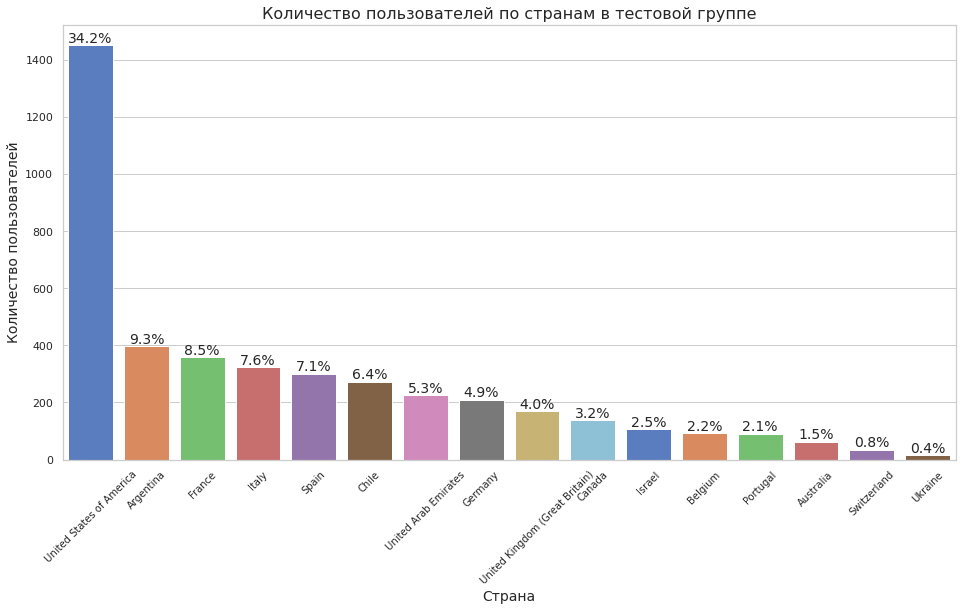

In [22]:
# Устанавим стиль графиков
sns.set(style="whitegrid")

# Создадим столбчатую диаграмму
plt.figure(figsize=(16, 8))
barplot=sns.barplot(x=filtred_users_test_by_countries.index, y=filtred_users_test_by_countries.values, palette='muted')

# Добавим заголовок и метки осей
plt.title('Количество пользователей по странам в тестовой группе', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)

# Перевернем подписи по оси X
plt.xticks(fontsize=10, rotation=45) 

# Вычислим общее количество пользователей
total_users = filtred_users_test_by_countries.sum()

# Добавим подписи в процентном соотношении
for p in barplot.patches:
    percentage = f'{(p.get_height() / total_users) * 100:.1f}%'  # Вычисляем процент
    barplot.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=14)

# Отобразим график
plt.show()

На этом графике мы видим максимальное количество пользователей из тестовой группы находятся в США (34,2%). Дальше идут Аргентина, Франция, Италия и Испания.

<h3>1.2. EDA users_control_1</h3>

Теперь рассмотрим данные по пользователям из первой контрольной группы.

In [23]:
users_control_1.head()

uid  age  attraction_coeff  coins                   country  \
0  892319115   25               435    NaN  United States of America   
1  891248523   29               500    NaN  United States of America   
2  891670932   33               800    NaN                    France   
3  891060786   26                 0    NaN                 Argentina   
4  892006554   35               294    NaN  United States of America   

                          visit_days  gender  age_filter_start  \
0                        1,2,3,4,5,6       0                22   
1                                1,2       1                26   
2             1,2,3,5,6,8,9,11,13,16       1                30   
3                          1,2,3,4,5       1                23   
4  1,2,3,5,6,7,8,9,10,12,15,16,17,19       1                30   

   age_filter_end  views_count  was_premium  is_premium  total_revenue  
0              32          982          NaN         NaN              0  
1              32           12          NaN         NaN              0  
2              36            5          NaN         NaN              0  
3              29            0          NaN         NaN              0  
4              40           17          NaN         NaN              0

In [24]:
users_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [25]:
users_control_1.shape

(4340, 13)

Опять видим пропущенные значения в столбцах coins (внутренняя валюта), что нормально, у пользователя может не быть монеток, также значения пропущены в стобцах visit_days, was_premium, is_premium. Пропуски в тех же столбцах, что и в тестовой группе. 

Заменим пропуски на 0 во всей таблице

In [26]:
users_control_1=users_control_1.fillna(0)

In [27]:
users_control_1.isna().sum()

uid                 0
age                 0
attraction_coeff    0
coins               0
country             0
visit_days          0
gender              0
age_filter_start    0
age_filter_end      0
views_count         0
was_premium         0
is_premium          0
total_revenue       0
dtype: int64

In [28]:
users_control_1.describe()

uid          age  attraction_coeff         coins       gender  \
count  4.340000e+03  4340.000000       4340.000000   4340.000000  4340.000000   
mean   8.917578e+08    32.095392        312.048848     24.136866     0.958065   
std    1.125683e+06    10.257466        320.972130   1518.279250     0.200465   
min    8.910510e+08    16.000000          0.000000      0.000000     0.000000   
25%    8.913626e+08    24.000000          0.000000      0.000000     1.000000   
50%    8.917272e+08    30.000000        238.500000      0.000000     1.000000   
75%    8.920898e+08    38.000000        518.000000      0.000000     1.000000   
max    9.609370e+08    99.000000       1000.000000  99958.000000     1.000000   

       age_filter_start  age_filter_end  views_count  was_premium  \
count       4340.000000     4340.000000  4340.000000  4340.000000   
mean          26.793779       38.553226    44.467512     0.100461   
std            9.405103       15.226951   204.800272     0.300648   
min           13.000000       19.000000     0.000000     0.000000   
25%           19.000000       28.000000     1.000000     0.000000   
50%           25.000000       35.000000     6.000000     0.000000   
75%           32.000000       45.000000    21.000000     0.000000   
max           96.000000      102.000000  4953.000000     1.000000   

        is_premium  total_revenue  
count  4340.000000    4340.000000  
mean      0.044240     594.761982  
std       0.205651    7987.922925  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.000000  
75%       0.000000       0.000000  
max       1.000000  486330.000000

In [29]:
(users_control_1.query('is_premium==1').uid.count()/users_control_1.uid.count()*100).round(2)

4.42

In [30]:
(users_control_1.query('was_premium==1').uid.count()/users_control_1.uid.count()*100).round(2)

10.05

In [31]:
total_revenue_control1=users_control_1.total_revenue.sum()
total_revenue_control1

2581267

In [32]:
(total_revenue_control1/total_revenue_test*100).round(2)

112.19

- Количество пользователей первой контрольной группы 4340 (в тестовой =4308).  
- Средний возраст пользователей первой контрольной группы 32 (такой же, как в тестовой), медианный 30 (как в тестовой), минимальный 16 (как в тестовой), максимальный 99 (как в тестовой).  
- Средний коэффициент привлекательности 312 (что на 4 пункта ниже, чем в тестовой), медианный 238,5(на 11,5 пунктов ниже, чем тест), максимальный 1000 (как в тестовой).  
- Премиум-подписка у 4.42% (в тестовой =3,64%).  
- Был когда-либо премимум у 10,05% пользователей (в тестовой =9,47%).   
- Общая сумма выручки в первой контрольной группе равна 2581267 (на 12,19% больше, чем в тестовой).
- Среднее значение выручки 594,76 Максимальное - 486330

Посмотрим у каких пользователей указана премиум-подписка, но нормированная выручка равнв 0

In [33]:
users_control_1_for_check=users_control_1.query('is_premium==0 & was_premium==0 & total_revenue!=0')
users_control_1_for_check

uid  age  attraction_coeff  coins                         country  \
5     891497961   28               400   28.0                           Chile   
532   891960267   27                 0   28.0                           Italy   
644   891792453   18                 0    8.0                       Australia   
801   891135642   47               200    1.0                           Chile   
1079  892140927   27                 0   28.0                          France   
1756  892104378   32               620   22.0        United States of America   
2665  891867801   24               444   10.0                          Israel   
2964  892069554   47               185    8.0  United Kingdom (Great Britain)   
2998  891653790   24               500    6.0                           Italy   
3293  891668241   29                 0   28.0        United States of America   
3514  891458229   23               333   28.0                           Spain   
3753  891382470   26                 0    0.0                          France   
3868  892102893   31               550   40.0        United States of America   

                                             visit_days  gender  \
5                                                   1,2       1   
532                                                   0       1   
644                 1,2,3,4,5,6,7,8,9,10,11,13,14,15,16       1   
801                                         1,2,3,4,5,6       1   
1079                                                  0       1   
1756                                              1,2,3       1   
2665                                                  1       1   
2964  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...       1   
2998               1,2,3,4,5,7,8,9,10,11,12,13,14,15,16       1   
3293                                                  0       1   
3514                                                  1       1   
3753                                                  0       1   
3868                            1,2,3,4,5,6,7,8,9,10,11       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
5                   25              31           25          0.0         0.0   
532                 24              30            0          0.0         0.0   
644                 18              21            0          0.0         0.0   
801                 40              46          165          0.0         0.0   
1079                24              30            0          0.0         0.0   
1756                29              35           58          0.0         0.0   
2665                21              30            9          0.0         0.0   
2964                19              38         1414          0.0         0.0   
2998                29              61            4          0.0         0.0   
3293                37              50            0          0.0         0.0   
3514                20              26            3          0.0         0.0   
3753                23              29            0          0.0         0.0   
3868                28              34          138          0.0         0.0   

      total_revenue  
5              6396  
532            3952  
644            1313  
801             962  
1079           3965  
1756           4602  
2665           6305  
2964          59267  
2998            728  
3293           6305  
3514           6305  
3753           2314  
3868          25220

Можно предположить, что была ошибка при записе данных. Пока ничего не буду делать с данными записями, позже посмотрим записи по ним в таблице с транзакциями

In [34]:
users_control_1.query('was_premium!=0 & total_revenue==0')

uid  age  attraction_coeff  coins                   country  \
26    892011666   35               416    0.0                   Belgium   
48    891366831   36                 0    0.0                     Spain   
54    891641769   22               666    0.0                   Belgium   
65    891100086   35               600    0.0                    France   
118   891709374   41               379    0.0  United States of America   
...         ...  ...               ...    ...                       ...   
4295  891062994   46               163    0.0               Switzerland   
4300  891303459   25               166    0.0                     Italy   
4307  891070455   24               555    0.0      United Arab Emirates   
4330  891664650   45               897    0.0  United States of America   
4332  891190344   29                 0    0.0                     Italy   

                                    visit_days  gender  age_filter_start  \
26    1,2,4,5,6,7,8,10,11,12,13,14,15,16,18,19       1                19   
48                                     1,2,3,4       1                33   
54                                         1,3       1                19   
65                                           0       1                32   
118                                      1,2,3       1                38   
...                                        ...     ...               ...   
4295                                   1,2,3,4       1                30   
4300                                 1,2,3,4,5       1                22   
4307                                   1,2,3,4       1                21   
4330       1,2,3,4,5,6,7,8,9,10,11,12,13,14,15       1                18   
4332                                         1       1                16   

      age_filter_end  views_count  was_premium  is_premium  total_revenue  
26                33           12          1.0         0.0              0  
48                39            0          1.0         0.0              0  
54                25            3          1.0         0.0              0  
65                38            5          1.0         1.0              0  
118               44           29          1.0         0.0              0  
...              ...          ...          ...         ...            ...  
4295              40           55          1.0         1.0              0  
4300              30           12          1.0         0.0              0  
4307              27           27          1.0         1.0              0  
4330              45          147          1.0         0.0              0  
4332              32            1          1.0         1.0              0  

[257 rows x 13 columns]

 Странно, что у пользователей стоит статус was_premium и при этом выручка равна нулю.

In [35]:
users_control_1.age.value_counts()

25    227
27    212
26    195
21    186
23    184
30    175
28    170
29    170
22    169
24    165
31    149
32    147
37    132
35    131
34    127
33    125
38    123
20    116
36    104
40     99
19     93
39     88
41     82
16     82
42     78
44     75
43     75
18     74
47     67
46     67
45     67
48     54
49     45
50     42
51     36
52     34
53     31
55     22
17     22
54     22
57     17
59     14
56     12
58     11
99      7
60      4
66      2
61      2
71      2
98      1
91      1
72      1
62      1
73      1
63      1
75      1
Name: age, dtype: int64

In [36]:
users_control_1.query('age>97')

uid  age  attraction_coeff  coins                         country  \
773   891746646   99               300    0.0                           Italy   
1466  891918399   99                62    0.0                           Italy   
1856  891374112   99               900    0.0            United Arab Emirates   
2103  892185039   99               759    0.0  United Kingdom (Great Britain)   
2238  892321845   99               500    0.0        United States of America   
2312  891682545   99                 0    0.0        United States of America   
2836  891900387   99               333    0.0                           Italy   
2908  892335240   98               593    0.0        United States of America   

                   visit_days  gender  age_filter_start  age_filter_end  \
773                         0       1                50              70   
1466                    1,2,3       1                50              99   
1856  1,2,3,4,5,6,7,8,9,10,11       1                16              99   
2103        1,2,3,4,5,6,7,8,9       1                43              49   
2238                        0       1                22              99   
2312                        0       1                96             102   
2836                    1,3,4       1                16              99   
2908                        1       1                22              28   

      views_count  was_premium  is_premium  total_revenue  
773            10          0.0         0.0              0  
1466           16          0.0         0.0              0  
1856          462          0.0         0.0              0  
2103           79          1.0         1.0           7332  
2238            4          0.0         0.0              0  
2312            0          0.0         0.0              0  
2836            3          0.0         0.0              0  
2908           32          0.0         0.0              0

В этой группе также скорее всего возраст 98, 99 был указан по ошибке.

Проверим нет ли ошибок в записе данных, когда коэффициент привлекательности не ноль, но число просмотров 0

In [37]:
users_control_1.nunique()

uid                 4340
age                   56
attraction_coeff     587
coins                 23
country               40
visit_days           881
gender                 2
age_filter_start      53
age_filter_end        78
views_count          339
was_premium            2
is_premium             2
total_revenue        128
dtype: int64

<h3>1.3. EDA users_control_2</h3>

In [38]:
users_control_2.head()

uid  age  attraction_coeff  coins                   country  \
0  892035504   37               137    NaN                    Israel   
1  891782112   57                 0    NaN                     Italy   
2  891110337   30               769    NaN                    France   
3  891796320   48               750    NaN                    France   
4  891880212   54               638    NaN  United States of America   

                     visit_days  gender  age_filter_start  age_filter_end  \
0       1,2,3,4,5,6,7,8,9,11,13       1                30              40   
1                             1       1                54              60   
2                     1,2,3,4,5       1                27              33   
3  1,4,6,8,10,11,12,14,15,16,18       1                45              51   
4                             1       1                35              53   

   views_count  was_premium  is_premium  total_revenue  
0           51          NaN         NaN              0  
1            0          NaN         NaN              0  
2           13          NaN         NaN              0  
3           12          NaN         NaN              0  
4           94          NaN         NaN              0

In [39]:
users_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [40]:
users_control_2.shape

(4264, 13)

Заменим пропущеные значения во всей таблице на 0

In [41]:
users_control_2=users_control_2.fillna(0)

In [42]:
users_control_2.isna().sum()

uid                 0
age                 0
attraction_coeff    0
coins               0
country             0
visit_days          0
gender              0
age_filter_start    0
age_filter_end      0
views_count         0
was_premium         0
is_premium          0
total_revenue       0
dtype: int64

In [43]:
users_control_2.describe()

uid          age  attraction_coeff        coins       gender  \
count  4.264000e+03  4264.000000       4264.000000  4264.000000  4264.000000   
mean   8.917694e+08    32.046201        317.957317     0.259615     0.954268   
std    2.520759e+06    10.170721        326.191737     4.724639     0.208927   
min    8.910509e+08    16.000000          0.000000     0.000000     0.000000   
25%    8.913453e+08    25.000000          0.000000     0.000000     1.000000   
50%    8.917205e+08    30.000000        250.000000     0.000000     1.000000   
75%    8.920735e+08    38.000000        548.500000     0.000000     1.000000   
max    1.053059e+09    99.000000       1000.000000   271.000000     1.000000   

       age_filter_start  age_filter_end   views_count  was_premium  \
count       4264.000000     4264.000000   4264.000000  4264.000000   
mean          26.954268       38.906895     45.064493     0.096388   
std            9.546657       15.955574    318.188992     0.295158   
min           13.000000       19.000000      0.000000     0.000000   
25%           19.000000       28.000000      1.000000     0.000000   
50%           25.000000       35.000000      6.000000     0.000000   
75%           32.000000       45.000000     20.000000     0.000000   
max           94.000000       99.000000  16157.000000     1.000000   

        is_premium  total_revenue  
count  4264.000000    4264.000000  
mean      0.044794     450.384146  
std       0.206875    2859.242228  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.000000  
75%       0.000000       0.000000  
max       1.000000   81796.000000

In [44]:
(users_control_2.query('is_premium==1').uid.count()/users_control_2.uid.count()*100).round(2)

4.48

In [45]:
(users_control_2.query('was_premium==1').uid.count()/users_control_2.uid.count()*100).round(2)

9.64

In [46]:
total_revenue_control2=users_control_2.total_revenue.sum()
total_revenue_control2

1920438

In [47]:
(100-total_revenue_control2/total_revenue_test*100).round(2)

16.53

In [48]:
(100-total_revenue_control2/total_revenue_control1*100).round(2)

25.6

- Количество пользователей второй контрольной группы 4264(в тестовой =4308, контроль1=4340). 
- Средний возраст пользователей второй контрольной группы 32 (такой же, как в тестовой и первой контрольной), медианный 30 (как в тестовой, контроль1), минимальный 16 (как в тестовойи в контрол1), максимальный 99 (как в тестовой и в контроль1). - Средний коэффициент привлекательности 318 (что на 2 пункта выше, чем в тесте и на 6 пунктов выше, чем в контролб1), медианный 250 (как в тестовой, на 11,5 пунктов выше, чем контроль1), максимальный 1000 (как в тестовой и в контроль1).
- Премиум-подписка у 4.48% пользователей (в тестовой =3,64%, контроль1 =4,42%).
- Был когда-либо премимум у 9,64% пользователей (в тестовой =9,47%, контроль1 =10,05%). 
- Общая сумма выручки во второй контрольной группе равна 1920438 (на 16,53% меньше, чем в тестовой и на 25,6% меньше, чем в контроль1).
- Среднее значение выручки 450,38 максимальное - 81796. 

Посмотрим у каких пользователей указана премиум-подписка, но нормированная выручка равнв 0

In [49]:
users_control_2_for_check=users_control_2.query('is_premium==0 & was_premium==0 & total_revenue!=0')
users_control_2_for_check

uid  age  attraction_coeff  coins                   country  \
5     892197879   28                71    0.0                     Italy   
643   892009254   21                 0    0.0                     Italy   
765   891317289   29               333    2.0                     Chile   
855   891232197   32               243    1.0                     Italy   
1044  891662685   39               272    0.0                    France   
1720  892345869   23              1000    0.0                     Chile   
1781  891841752   22               541    0.0  United States of America   
1833  891260820   24               318    0.0  United States of America   
2408  892069761   16                90   16.0                 Argentina   
3874  891750606   46               395    4.0                    France   
4135  892395564   32               439    0.0  United States of America   
4182  891333651   34                 0    0.0                    France   

                                 visit_days  gender  age_filter_start  \
5                                         1       1                25   
643                             1,3,4,5,6,7       1                18   
765                         1,2,3,4,5,6,7,8       1                21   
855                                     1,2       1                29   
1044                                     11       1                36   
1720                                      1       1                20   
1781  1,2,3,4,5,6,7,10,11,12,13,14,15,16,18       1                19   
1833                      1,2,3,4,5,6,7,8,9       1                21   
2408                                  1,2,3       1                16   
3874    1,2,3,4,5,6,7,8,9,10,11,12,13,15,16       1                43   
4135                                  1,2,3       0                29   
4182                                  2,3,4       1                31   

      age_filter_end  views_count  was_premium  is_premium  total_revenue  
5                 31           14          0.0         0.0           2522  
643               24            0          0.0         0.0           7072  
765               32           12          0.0         0.0            481  
855               35           82          0.0         0.0           3900  
1044              42           11          0.0         0.0           2717  
1720              26            4          0.0         0.0           2457  
1781              25          179          0.0         0.0           1586  
1833              27           22          0.0         0.0            897  
2408              20           11          0.0         0.0           6305  
3874              49          291          0.0         0.0           7813  
4135              35          878          0.0         0.0           2730  
4182              37            0          0.0         0.0           1456

Пока ничего не буду делать с данными записями, потом посмотрим записи по ним в таблице с транзакциями

In [50]:
users_control_2.query('was_premium!=0 & total_revenue==0')

uid  age  attraction_coeff  coins                   country  \
27    891958227   31               365    0.0  United States of America   
34    892235217   49               417    0.0  United States of America   
52    891293337   34               530    0.0  United States of America   
66    892363275   39               500    0.0                   Germany   
74    891996033   27               166    0.0                 Argentina   
...         ...  ...               ...    ...                       ...   
4186  891097317   29              1000    0.0                    Canada   
4191  891055815   24                 0    0.0                  Portugal   
4204  891817071   28                 0    0.0                    France   
4211  891333783   31               642    0.0  United States of America   
4238  891336669   28                 0    0.0                    France   

                    visit_days  gender  age_filter_start  age_filter_end  \
27    1,2,3,4,5,7,8,9,11,12,13       1                28              34   
34                           1       1                46              52   
52                 1,2,3,4,5,7       1                31              37   
66                           0       1                36              42   
74                           0       1                24              30   
...                        ...     ...               ...             ...   
4186                         0       1                26              32   
4191                         1       1                21              27   
4204                         1       1                25              31   
4211      1,2,3,4,5,6,7,8,9,10       1                27              40   
4238                     1,2,3       1                25              31   

      views_count  was_premium  is_premium  total_revenue  
27             63          1.0         0.0              0  
34             79          1.0         0.0              0  
52             49          1.0         0.0              0  
66             12          1.0         0.0              0  
74              6          1.0         0.0              0  
...           ...          ...         ...            ...  
4186            1          1.0         1.0              0  
4191            0          1.0         1.0              0  
4204            0          1.0         0.0              0  
4211          109          1.0         0.0              0  
4238            0          1.0         0.0              0  

[236 rows x 13 columns]

Сранно, что у пользователей стоит статус was_premium и при этом выручка равна нулю.

In [51]:
users_control_2.age.value_counts()

25    241
27    226
24    189
26    185
29    173
21    171
22    169
31    168
30    167
28    165
32    165
34    153
23    149
35    117
20    115
40    114
33    108
37    107
19     94
36     92
41     91
38     87
16     87
39     81
42     80
43     77
18     74
44     65
46     64
48     52
45     51
49     50
47     50
51     36
50     35
54     32
52     30
55     28
53     26
56     19
57     14
59     13
60     12
58     11
17      9
70      3
63      3
61      3
99      2
66      2
64      1
92      1
78      1
65      1
73      1
77      1
87      1
67      1
90      1
Name: age, dtype: int64

In [52]:
users_control_2.query('age>97')

uid  age  attraction_coeff  coins  country  \
1100  891995541   99               213    0.0  Ukraine   
2571  891559305   99               440    0.0  Germany   

                                             visit_days  gender  \
1100  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...       1   
2571                                                1,2       0   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
1100                18              99          197          1.0         1.0   
2571                24              37           25          0.0         0.0   

      total_revenue  
1100           8879  
2571              0

Проверим нет ли ошибок в записе данных, когда коэффициент привлекательности не ноль, но число просмотров 0.


In [53]:
users_control_2.query('attraction_coeff>0 & views_count==0')

Empty DataFrame
Columns: [uid, age, attraction_coeff, coins, country, visit_days, gender, age_filter_start, age_filter_end, views_count, was_premium, is_premium, total_revenue]
Index: []

In [54]:
users_control_2.nunique()

uid                 4264
age                   59
attraction_coeff     585
coins                 24
country               45
visit_days           838
gender                 2
age_filter_start      56
age_filter_end        79
views_count          328
was_premium            2
is_premium             2
total_revenue        128
dtype: int64

Так как A/B тест был проведен для пользователей из нескольких стран, оставим во всех таблицах только пользователей из стран, которые есть в тестовой группе (users_test).

In [55]:
users_control_1 = users_control_1[users_control_1['country'].isin(users_test['country'])]
users_control_2 = users_control_2[users_control_2['country'].isin(users_test['country'])]
transactions_control_1 = transactions_control_1[transactions_control_1['country'].isin(users_test['country'])]
transactions_control_2 = transactions_control_2[transactions_control_2['country'].isin(users_test['country'])]

Посмотрим как распределились пользователи по странам в каждой из групп.

In [56]:
users_test_countries = users_test['country'].value_counts()
users_test_countries_flt = users_test_countries[users_test_countries>7].sort_values(ascending=False)    
users_control_1_countries = users_control_1['country'].value_counts()
users_control_1_countries_flt = users_control_1_countries[users_control_1_countries>7].sort_values(ascending=False)   
users_control_2_countries = users_control_2['country'].value_counts()
users_control_2_countries_flt = users_control_2_countries[users_control_2_countries>7].sort_values(ascending=False)   

In [57]:
df_all_users = pd.DataFrame({
    'test_users': users_test_countries_flt,
    'control_1_users': users_control_1_countries_flt,
    'control_2_users': users_control_2_countries_flt
})
df_all_users=df_all_users.reset_index().rename(columns={'index':'country'})

In [58]:
df_all_users_2 = df_all_users.melt(id_vars='country', var_name='Group', value_name='Users').sort_values(by='Users',ascending=False)
df_all_users_2

country            Group   Users
53        United States of America  control_2_users  1486.0
35        United States of America  control_1_users  1471.0
17        United States of America       test_users  1450.0
36                       Argentina  control_2_users   397.0
0                        Argentina       test_users   396.0
18                       Argentina  control_1_users   389.0
41                          France  control_2_users   376.0
23                          France  control_1_users   370.0
5                           France       test_users   359.0
29                           Spain  control_1_users   342.0
26                           Italy  control_1_users   338.0
8                            Italy       test_users   323.0
47                           Spain  control_2_users   310.0
11                           Spain       test_users   301.0
44                           Italy  control_2_users   293.0
22                           Chile  control_1_users   287.0
40                           Chile  control_2_users   286.0
4                            Chile       test_users   272.0
15            United Arab Emirates       test_users   226.0
51            United Arab Emirates  control_2_users   211.0
6                          Germany       test_users   209.0
33            United Arab Emirates  control_1_users   207.0
42                         Germany  control_2_users   202.0
24                         Germany  control_1_users   188.0
16  United Kingdom (Great Britain)       test_users   169.0
34  United Kingdom (Great Britain)  control_1_users   146.0
52  United Kingdom (Great Britain)  control_2_users   146.0
3                           Canada       test_users   137.0
21                          Canada  control_1_users   134.0
39                          Canada  control_2_users   134.0
25                          Israel  control_1_users   109.0
20                         Belgium  control_1_users   108.0
7                           Israel       test_users   106.0
45                        Portugal  control_2_users   100.0
27                        Portugal  control_1_users   100.0
2                          Belgium       test_users    92.0
9                         Portugal       test_users    91.0
38                         Belgium  control_2_users    90.0
43                          Israel  control_2_users    78.0
1                        Australia       test_users    62.0
37                       Australia  control_2_users    51.0
19                       Australia  control_1_users    50.0
30                     Switzerland  control_1_users    42.0
48                     Switzerland  control_2_users    35.0
12                     Switzerland       test_users    35.0
50                         Ukraine  control_2_users    18.0
14                         Ukraine       test_users    15.0
32                         Ukraine  control_1_users     8.0
31                          Turkey  control_1_users     8.0
46              Russian Federation  control_2_users     8.0
10              Russian Federation       test_users     NaN
13                          Turkey       test_users     NaN
28              Russian Federation  control_1_users     NaN
49                          Turkey  control_2_users     NaN

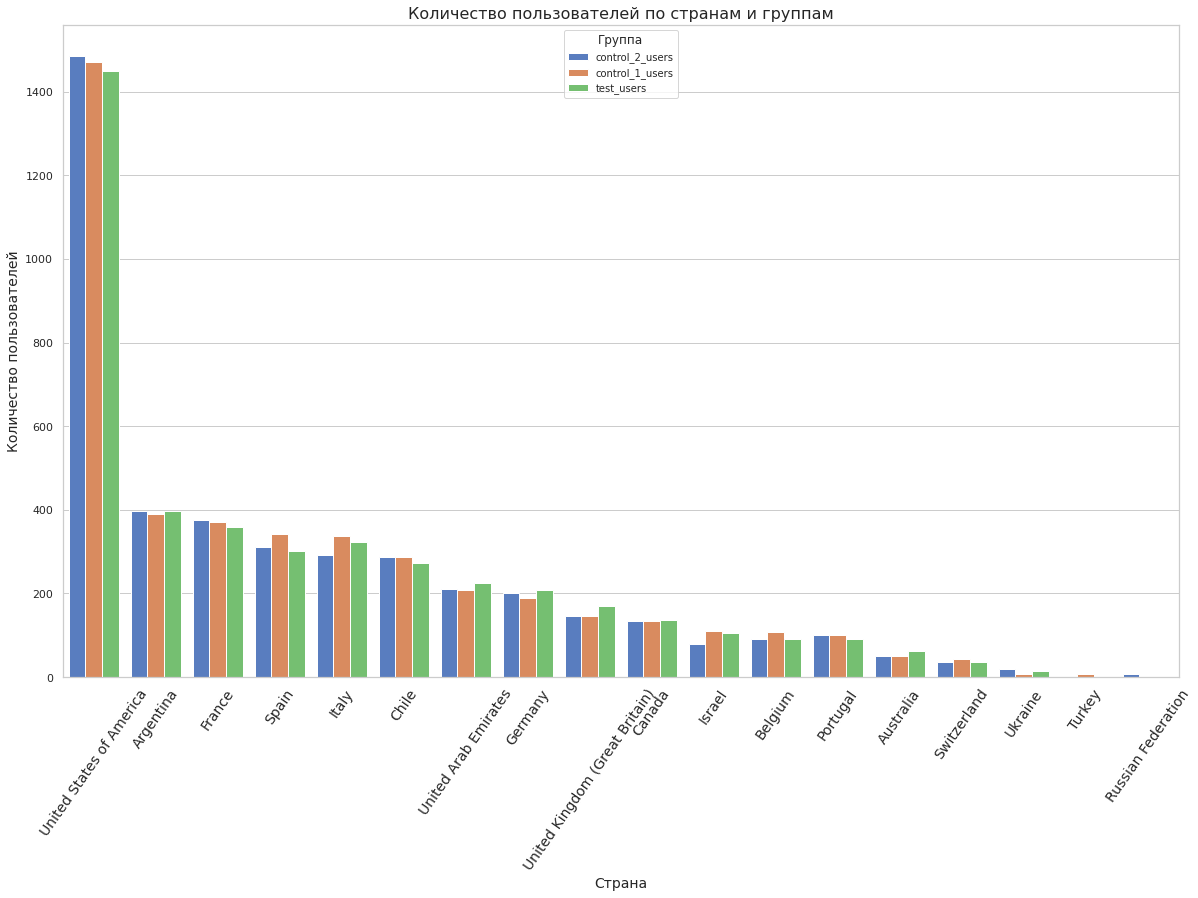

In [59]:
# Установим стиль графика
sns.set(style="whitegrid")

# Создадим барплот
plt.figure(figsize=(20, 12))
bar_plot1 = sns.barplot(data=df_all_users_2, x='country', y='Users', hue='Group', palette='muted')

# Добавим заголовок и метки осей
plt.title('Количество пользователей по странам и группам', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)

# Перевернем подписи по оси X
plt.xticks(fontsize=14, rotation=55) 

# Вычислим общее количество пользователей
total_users_2 = df_all_users_2.Users.sum()

# Выведем график
# Показываем график
plt.legend(title = 'Группа', fontsize = 10)
plt.show()

На этом графике видно, что большая часть пользователей во всех трех группах из Америки, дальше по количеству пользователей входят Аргентина, Франция, Испания и Италия.

Теперь добавим колонгу Group во все таблицы.

In [60]:
users_test['group']='test'
users_control_1['group']='control_1'
users_control_2['group']='control_2'

Теперь сделаем объединение всех таблиц для упрощения дальнейшего анализа.

In [61]:
full_group_users = pd.concat([users_test, users_control_1, users_control_2], axis=0)
full_group_users

uid  age  attraction_coeff  coins                         country  \
0     892309896   27               685    0.0        United States of America   
1     892044516   27                 0    0.0                         Germany   
2     892185708   45                44    0.0                          Israel   
3     892130292   32                 0    0.0        United States of America   
4     891406035   27              1000    0.0                          France   
...         ...  ...               ...    ...                             ...   
4259  891937401   63               242    0.0                           Italy   
4260  891692844   35               500    0.0                          France   
4261  891096429   41               333    0.0        United States of America   
4262  891697584   48               210    0.0  United Kingdom (Great Britain)   
4263  891095634   22                 0    0.0                           Italy   

                                             visit_days  gender  \
0                      1,2,3,4,5,6,7,8,9,10,11,12,16,17       1   
1                                                     0       1   
2     1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...       1   
3                            1,2,3,4,5,6,7,8,9,10,11,12       1   
4                                                     0       1   
...                                                 ...     ...   
4259                                                1,2       1   
4260                     1,2,3,4,5,6,8,9,10,11,12,14,16       1   
4261                                                  0       1   
4262                              2,3,5,7,9,10,12,14,15       1   
4263                                                  0       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                   24              30           89          0.0         0.0   
1                   24              30            0          0.0         0.0   
2                   42              48           68          0.0         0.0   
3                   29              35            0          0.0         0.0   
4                   24              30            1          1.0         0.0   
...                ...             ...          ...          ...         ...   
4259                50              66           33          0.0         0.0   
4260                24              45            2          0.0         0.0   
4261                38              44            6          0.0         0.0   
4262                45              51           19          0.0         0.0   
4263                19              25            0          0.0         0.0   

      total_revenue      group  
0                 0       test  
1                 0       test  
2                 0       test  
3                 0       test  
4                 0       test  
...             ...        ...  
4259              0  control_2  
4260              0  control_2  
4261              0  control_2  
4262              0  control_2  
4263              0  control_2  

[12887 rows x 14 columns]

In [62]:
full_group_users.shape

(12887, 14)

Теперь рассмотрим распределение пользователей по возрасту во всех 3 группах.

In [63]:
full_group_users_age=full_group_users.groupby(['age','group'], as_index=False).uid.nunique().rename(columns={'uid':'users'})
full_group_users_age=full_group_users_age.query('users>7')

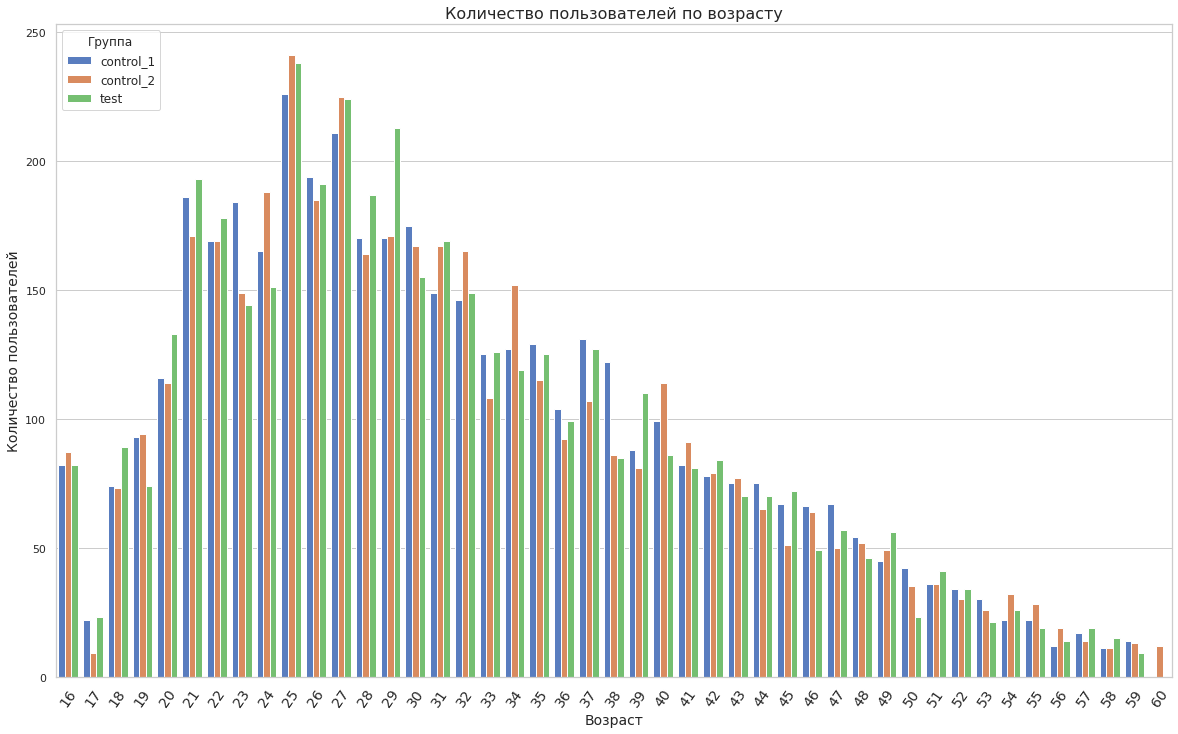

In [64]:
# Установим стиль графика
sns.set(style="whitegrid")

# Создадим барплот
plt.figure(figsize=(20, 12))
sns.barplot(data=full_group_users_age, x='age', y='users', hue='group', palette='muted')

# Добавим заголовок и метки осей
plt.title('Количество пользователей по возрасту', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)

# Перевернем подписи по оси X
plt.xticks(fontsize=14, rotation=55) 

# Покажем легенду
plt.legend(title='Группа', fontsize=12)

# Покажим график
plt.show()

Посмотрим на соотношение количества пользователейво всех группах по полу.

In [65]:
full_group_users_gender=full_group_users.groupby(['gender','group'], as_index=False).uid.nunique().rename(columns={'uid':'users'})
full_group_users_gender

gender      group  users
0       0  control_1    182
1       0  control_2    194
2       0       test    202
3       1  control_1   4148
4       1  control_2   4055
5       1       test   4106

Можно заметить, что по статистике большинство пользователей дейтинговых приложений это мужчины, поэтому будем считать, что 0 это мужчины, а 1 это женщины. Исходя из данных таблицы можно отметить, что во всех трех группах количество мужчин значительно больше, чем женщин.

Теперь проверим, что польлзователи из каждых групп не пересекались между собой.

In [66]:
users_test_copy = users_test.copy()
users_control_1_copy = users_control_1.copy()
users_control_2_copy = users_control_2.copy()

In [67]:
print(users_test_copy.shape)
print(users_control_1_copy.shape)
print(users_control_2_copy.shape)

(4308, 14)
(4330, 14)
(4249, 14)


Сделаем проверку наличия идентификаторов из группы users_test в группе users_control_1.

In [68]:
users_test_copy['exists_test_in_control1'] = users_test_copy['uid'].isin(users_control_1_copy['uid'])
print("\nРезультат проверки:")
users_test_copy['exists_test_in_control1'].value_counts()


Результат проверки:


False    4308
Name: exists_test_in_control1, dtype: int64

Сделаем проверку наличия идентификаторов из группы users_test в группе users_control_2.

In [69]:
users_test_copy['exists_test_in_control2'] = users_test_copy['uid'].isin(users_control_2_copy['uid'])
print("\nРезультат проверки:")
users_test_copy['exists_test_in_control2'].value_counts()


Результат проверки:


False    4308
Name: exists_test_in_control2, dtype: int64

Сделаем проверку наличия идентификаторов из группы users_control_1 в группе users_control_2.

In [70]:
users_control_1_copy['exists_control1_in_control2'] = users_control_1_copy['uid'].isin(users_control_2_copy['uid'])
print("\nРезультат проверки:")
users_control_1_copy['exists_control1_in_control2'].value_counts()


Результат проверки:


False    4330
Name: exists_control1_in_control2, dtype: int64

На основании полученных данных можно сделать вывод о том, что все пользователи из каждой группы уникальны и не встречаются в других группах.

<h2>2. EDA транзакций </h2>

<h3>2.1. EDA transactions_test</h3>

Посмотрим на данные транзакций.

In [71]:
transactions_test.head()

uid                   country            joined_at  \
0  891345942                     Italy  2017-05-11 13:00:00   
1  892054251  United States of America  2017-10-22 00:33:00   
2  892236423  United States of America  2017-10-18 01:09:00   
3  892236423  United States of America  2017-10-18 01:09:00   
4  892168170  United States of America  2017-10-19 17:10:00   

               paid_at  revenue  payment_id        from_page   product_type  
0  2017-11-13 15:04:00    12909         147  trial_vip_popup  trial_premium  
1  2017-10-30 01:37:00    13923         147  trial_vip_popup  trial_premium  
2  2017-10-23 00:15:00     3783          67             menu     other_type  
3  2017-10-27 22:38:00     3783          67             menu     other_type  
4  2017-10-27 19:10:00     9087         147  trial_vip_popup  trial_premium

In [73]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


Тут видно что в столбцах с датами указан формат object. Преобразуем его в формат даты и времени.

In [72]:
transactions_test['joined_at'] = pd.to_datetime(transactions_test['joined_at'])
transactions_test['paid_at'] = pd.to_datetime(transactions_test['paid_at'])

Сделаем проверку.

In [73]:
transactions_test.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                  int64
payment_id               int64
from_page               object
product_type            object
dtype: object

In [74]:
transactions_test.shape

(273, 8)

In [75]:
transactions_test.nunique()

uid             146
country          17
joined_at       146
paid_at         258
revenue         125
payment_id        6
from_page        22
product_type      4
dtype: int64

Сделаем проверку на дубликаты данным и удалим их.

In [76]:
duplicates = transactions_test[transactions_test.duplicated()]
duplicates 

uid                   country           joined_at  \
55   892236423  United States of America 2017-10-18 01:09:00   
96   892050108                    Israel 2017-10-22 03:02:00   
127  892236423  United States of America 2017-10-18 01:09:00   
158  891508155                    Latvia 2017-02-11 09:46:00   
188  892236423  United States of America 2017-10-18 01:09:00   
205  892202526  United States of America 2017-10-18 20:34:00   
243  892339626  United States of America 2017-10-15 23:21:00   

                paid_at  revenue  payment_id    from_page product_type  
55  2017-10-23 00:15:00     3783          67         menu   other_type  
96  2017-10-23 02:53:00     1261          19  empty_likes        coins  
127 2017-10-27 22:38:00     3783          67         menu   other_type  
158 2017-03-11 22:06:00      936          19  empty_likes        coins  
188 2017-10-22 22:08:00     1261          19  empty_likes        coins  
205 2017-10-20 19:54:00      897          19         menu        coins  
243 2017-10-20 18:14:00      754          19  empty_likes        coins

In [77]:
transactions_test = transactions_test.drop_duplicates()

In [78]:
transactions_test.shape

(266, 8)

Теперь можем посмотреть на количество транзакций по типу продукта.

In [79]:
transactions_test.product_type.value_counts()

coins               101
premium_no_trial     76
trial_premium        62
other_type           27
Name: product_type, dtype: int64

Видим, что большинство опреаций совершается за монетки (внутреннюю валюту).

В задании нам сказали, об изменении стоимости премиум-подписки через 2 новые платежные системы. Стоит отметить, что единственная графа, которая может обозначать платежную систему это payment_id.

Посмотрюим на количество транзакций с типом премиум-подписка без пробной в разрезе платежных систем.

In [80]:
transactions_test.query('product_type=="premium_no_trial"').payment_id.value_counts()

147    63
68     12
0       1
Name: payment_id, dtype: int64

По полученным данным можно предположить, что новые платежные системы это 147 и 68. Также 0 скорее всего ошибочно записанная транзакция и мы можем ее удалить.

In [81]:
transactions_test.query('product_type=="premium_no_trial" & payment_id==0')

uid               country           joined_at             paid_at  \
220  891725043  United Arab Emirates 2017-10-29 00:49:00 2017-10-29 07:48:00   

     revenue  payment_id from_page      product_type  
220     9217           0      none  premium_no_trial

In [82]:
transactions_test=transactions_test.drop(index = 220)
transactions_test.shape

(265, 8)

In [83]:
users_test.query('uid==891725043')

uid  age  attraction_coeff  coins               country  \
2935  891725043   28               282    0.0  United Arab Emirates   

                             visit_days  gender  age_filter_start  \
2935  1,2,3,4,5,6,8,9,10,12,13,15,16,17       1                25   

      age_filter_end  views_count  was_premium  is_premium  total_revenue  \
2935              31          117          1.0         1.0          18434   

     group  
2935  test

Теперь удалим записи с платежной системой 0.

In [84]:
users_test=users_test.drop(index = 2935)
users_test.shape

(4307, 14)

In [85]:
transactions_test.joined_at.min()

Timestamp('2017-01-11 03:07:00')

In [86]:
transactions_test.joined_at.max()

Timestamp('2017-10-31 23:40:00')

In [87]:
transactions_test.paid_at.min()

Timestamp('2017-01-11 04:37:00')

In [88]:
transactions_test.paid_at.max()

Timestamp('2017-12-11 22:06:00')

Мы смотрим на дынные временного промежутка проведения А/В теста и видим, что он продолжался почти 11 месяцев.  
Стоит отемтить, что обычная продолжительность А/В теста примерно 2 месяца.  
Возможно здесь есть ошибка. Их нужно проверить.

In [89]:
test_joined_at = transactions_test['joined_at'].sort_values(ascending=False).tolist()
test_joined_at

[Timestamp('2017-10-31 23:40:00'),
 Timestamp('2017-10-31 20:40:00'),
 Timestamp('2017-10-31 14:16:00'),
 Timestamp('2017-10-31 14:16:00'),
 Timestamp('2017-10-31 14:16:00'),
 Timestamp('2017-10-31 14:16:00'),
 Timestamp('2017-10-31 14:16:00'),
 Timestamp('2017-10-31 08:41:00'),
 Timestamp('2017-10-31 08:41:00'),
 Timestamp('2017-10-31 08:41:00'),
 Timestamp('2017-10-31 06:36:00'),
 Timestamp('2017-10-31 06:36:00'),
 Timestamp('2017-10-31 05:09:00'),
 Timestamp('2017-10-30 23:01:00'),
 Timestamp('2017-10-30 17:14:00'),
 Timestamp('2017-10-30 13:47:00'),
 Timestamp('2017-10-30 07:50:00'),
 Timestamp('2017-10-30 06:05:00'),
 Timestamp('2017-10-30 05:59:00'),
 Timestamp('2017-10-30 05:59:00'),
 Timestamp('2017-10-30 05:59:00'),
 Timestamp('2017-10-29 15:40:00'),
 Timestamp('2017-10-29 13:19:00'),
 Timestamp('2017-10-29 08:03:00'),
 Timestamp('2017-10-29 05:42:00'),
 Timestamp('2017-10-29 00:49:00'),
 Timestamp('2017-10-28 06:09:00'),
 Timestamp('2017-10-28 06:09:00'),
 Timestamp('2017-10-

In [90]:
test_paid_at = transactions_test['paid_at'].sort_values(ascending=False).tolist()
test_paid_at

[Timestamp('2017-12-11 22:06:00'),
 Timestamp('2017-12-11 21:20:00'),
 Timestamp('2017-12-11 17:26:00'),
 Timestamp('2017-12-11 16:34:00'),
 Timestamp('2017-12-11 16:05:00'),
 Timestamp('2017-12-11 08:25:00'),
 Timestamp('2017-12-11 02:11:00'),
 Timestamp('2017-12-11 02:10:00'),
 Timestamp('2017-12-11 00:11:00'),
 Timestamp('2017-11-15 09:31:00'),
 Timestamp('2017-11-15 04:33:00'),
 Timestamp('2017-11-14 11:22:00'),
 Timestamp('2017-11-14 09:47:00'),
 Timestamp('2017-11-14 09:45:00'),
 Timestamp('2017-11-14 09:16:00'),
 Timestamp('2017-11-14 04:37:00'),
 Timestamp('2017-11-14 04:33:00'),
 Timestamp('2017-11-14 04:33:00'),
 Timestamp('2017-11-14 03:39:00'),
 Timestamp('2017-11-14 01:57:00'),
 Timestamp('2017-11-14 01:12:00'),
 Timestamp('2017-11-13 15:04:00'),
 Timestamp('2017-11-13 11:21:00'),
 Timestamp('2017-11-13 05:58:00'),
 Timestamp('2017-11-13 03:46:00'),
 Timestamp('2017-11-13 03:42:00'),
 Timestamp('2017-11-13 00:52:00'),
 Timestamp('2017-11-11 23:51:00'),
 Timestamp('2017-11-

Исходя изполученных данных эксперимент длился с 2017-10-14 по 2017-11-15.  
В графе joined_at в ноябре даты записаны некорректно: число перепутано местами с месяцем.  
В графе paid_at с 2017-10-14 по 2017-10-31 и далее с 2017-11-13 по 2017-11-15 записаны корректно.   
Видим, что в данных с 2017-11-01 по 2017-11-12  число перепутано местами с месяцем.

Теперь создадим функцию, внутри которой создададим маску для определения строк, в которых число = 11.


In [91]:
def replace_day_with_month(df, date_column):
    # Заменим день на месяц, если число = 11
    mask = df[date_column].dt.day == 11
    df.loc[mask, date_column] = df.loc[mask, date_column].apply(lambda x: x.replace(day=x.month, month=11))

# Применим функцию 
for df in [transactions_test]:
    replace_day_with_month(df, 'joined_at')
    replace_day_with_month(df, 'paid_at')

Сделаем проверку работы нащей функии к нашим датам.

In [92]:
transactions_test['joined_at'].sort_values(ascending=False).tolist()

[Timestamp('2017-11-10 10:20:00'),
 Timestamp('2017-11-08 18:39:00'),
 Timestamp('2017-11-08 07:24:00'),
 Timestamp('2017-11-08 07:24:00'),
 Timestamp('2017-11-08 07:24:00'),
 Timestamp('2017-11-08 07:24:00'),
 Timestamp('2017-11-08 07:24:00'),
 Timestamp('2017-11-08 07:24:00'),
 Timestamp('2017-11-08 06:41:00'),
 Timestamp('2017-11-08 03:54:00'),
 Timestamp('2017-11-08 03:54:00'),
 Timestamp('2017-11-08 03:54:00'),
 Timestamp('2017-11-07 09:26:00'),
 Timestamp('2017-11-07 09:26:00'),
 Timestamp('2017-11-07 08:52:00'),
 Timestamp('2017-11-07 07:02:00'),
 Timestamp('2017-11-07 03:39:00'),
 Timestamp('2017-11-07 02:37:00'),
 Timestamp('2017-11-07 01:38:00'),
 Timestamp('2017-11-06 23:56:00'),
 Timestamp('2017-11-06 23:12:00'),
 Timestamp('2017-11-06 22:47:00'),
 Timestamp('2017-11-06 22:47:00'),
 Timestamp('2017-11-06 09:33:00'),
 Timestamp('2017-11-06 09:33:00'),
 Timestamp('2017-11-06 09:21:00'),
 Timestamp('2017-11-06 04:34:00'),
 Timestamp('2017-11-06 01:35:00'),
 Timestamp('2017-11-

In [93]:
transactions_test['paid_at'].sort_values(ascending=False).tolist()

[Timestamp('2017-11-15 09:31:00'),
 Timestamp('2017-11-15 04:33:00'),
 Timestamp('2017-11-14 11:22:00'),
 Timestamp('2017-11-14 09:47:00'),
 Timestamp('2017-11-14 09:45:00'),
 Timestamp('2017-11-14 09:16:00'),
 Timestamp('2017-11-14 04:37:00'),
 Timestamp('2017-11-14 04:33:00'),
 Timestamp('2017-11-14 04:33:00'),
 Timestamp('2017-11-14 03:39:00'),
 Timestamp('2017-11-14 01:57:00'),
 Timestamp('2017-11-14 01:12:00'),
 Timestamp('2017-11-13 15:04:00'),
 Timestamp('2017-11-13 11:21:00'),
 Timestamp('2017-11-13 05:58:00'),
 Timestamp('2017-11-13 03:46:00'),
 Timestamp('2017-11-13 03:42:00'),
 Timestamp('2017-11-13 00:52:00'),
 Timestamp('2017-11-12 22:06:00'),
 Timestamp('2017-11-12 21:20:00'),
 Timestamp('2017-11-12 17:26:00'),
 Timestamp('2017-11-12 16:34:00'),
 Timestamp('2017-11-12 16:05:00'),
 Timestamp('2017-11-12 08:25:00'),
 Timestamp('2017-11-12 02:11:00'),
 Timestamp('2017-11-12 02:10:00'),
 Timestamp('2017-11-12 00:11:00'),
 Timestamp('2017-11-11 23:51:00'),
 Timestamp('2017-11-

In [94]:
min_joined_at_test = transactions_test.joined_at.min()
max_joined_at_test = transactions_test.joined_at.max()
min_paid_at_test = transactions_test.paid_at.min()
max_paid_at_test = transactions_test.paid_at.max()

# Выведем результаты
print(f"Минимальная дата 'joined_at': {min_joined_at_test}")
print(f"Максимальная дата 'joined_at': {max_joined_at_test}")
print(f"Минимальная дата 'paid_at': {min_paid_at_test}")
print(f"Максимальная дата 'paid_at': {max_paid_at_test}")

Минимальная дата 'joined_at': 2017-10-14 00:58:00
Максимальная дата 'joined_at': 2017-11-10 10:20:00
Минимальная дата 'paid_at': 2017-10-14 04:23:00
Максимальная дата 'paid_at': 2017-11-15 09:31:00


Теперь мы видим более достоверные показатели о длительности эксперимента. Получается месяц.

Сделаем проверку записей, у которым время регистрации больше, чем время оплаты.

In [95]:
transactions_test.query('joined_at>paid_at')

Empty DataFrame
Columns: [uid, country, joined_at, paid_at, revenue, payment_id, from_page, product_type]
Index: []

In [96]:
transactions_test.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                  int64
payment_id               int64
from_page               object
product_type            object
dtype: object

In [97]:
transactions_test.revenue.sum()

2323009

In [98]:
users_test_for_check_2.shape

(6, 13)

Сделаем проверку пользователей из данных о пользователях, которых нужно проверить (выручка не 0, но указано, что пользователи не являются премиумом и никогда им не были).

In [99]:
test_full_data_check_2=pd.merge(users_test_for_check_2, transactions_test, on='uid', how='left')
test_full_data_check_2

uid  age  attraction_coeff  coins                 country_x  \
0  892333656   50               436    4.0  United States of America   
1  891914511   30               500    4.0               Switzerland   
2  891914322   35               500    6.0  United States of America   
3  891999783   30               793    6.0  United States of America   
4  891999783   30               793    6.0  United States of America   
5  891999783   30               793    6.0  United States of America   
6  891632079   30               100    9.0  United States of America   
7  891175326   29               666    6.0  United States of America   

                                          visit_days  gender  \
0                                            1,2,3,4       1   
1                                                  1       1   
2                                  1,2,3,4,5,6,7,8,9       1   
3  1,2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20...       1   
4  1,2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20...       1   
5  1,2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20...       1   
6                                                5,6       1   
7                                          1,2,3,5,7       1   

   age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                47              53          126          0.0         0.0   
1                18              43            2          0.0         0.0   
2                32              38           48          0.0         0.0   
3                27              33           29          0.0         0.0   
4                27              33           29          0.0         0.0   
5                27              33           29          0.0         0.0   
6                27              33           20          0.0         0.0   
7                26              32            3          0.0         0.0   

   total_revenue                 country_y           joined_at  \
0            897  United States of America 2017-10-16 01:45:00   
1           1508               Switzerland 2017-10-24 23:15:00   
2            741  United States of America 2017-10-24 23:20:00   
3           3783  United States of America 2017-10-23 04:21:00   
4           3783  United States of America 2017-10-23 04:21:00   
5           3783  United States of America 2017-10-23 04:21:00   
6           4537  United States of America 2017-10-30 17:14:00   
7            897  United States of America 2017-11-08 06:41:00   

              paid_at  revenue  payment_id    from_page product_type  
0 2017-10-16 01:49:00      897         146  empty_likes        coins  
1 2017-10-25 03:21:00     1508         146  empty_likes        coins  
2 2017-10-24 23:23:00      741         146         menu        coins  
3 2017-10-23 06:13:00     1261          19   autorefill        coins  
4 2017-10-23 06:12:00     1261          19  empty_likes        coins  
5 2017-10-23 06:11:00     1261          19  empty_likes        coins  
6 2017-10-30 22:04:00     4537          19     sympathy   other_type  
7 2017-11-09 04:33:00      897         146  empty_likes        coins

In [100]:
test_full_data_check_2.isna().sum()

uid                 0
age                 0
attraction_coeff    0
coins               0
country_x           0
visit_days          0
gender              0
age_filter_start    0
age_filter_end      0
views_count         0
was_premium         0
is_premium          0
total_revenue       0
country_y           0
joined_at           0
paid_at             0
revenue             0
payment_id          0
from_page           0
product_type        0
dtype: int64

Как мы видим по записям из таблицы транзакций, покупка была либо за внутреннюю валюту, либо другой тип. Так как невозможно точно установить являются ли пользователи премиум либо когда-то были премиумом, удалим эти записи из таблицы users_test и transactions_test.

In [101]:
transactions_test.query('uid==[892333656,891914511,891914322,891999783,891632079,891175326]')

uid                   country           joined_at  \
8    891999783  United States of America 2017-10-23 04:21:00   
65   891999783  United States of America 2017-10-23 04:21:00   
75   891175326  United States of America 2017-11-08 06:41:00   
116  891632079  United States of America 2017-10-30 17:14:00   
142  891914511               Switzerland 2017-10-24 23:15:00   
156  891914322  United States of America 2017-10-24 23:20:00   
157  891999783  United States of America 2017-10-23 04:21:00   
261  892333656  United States of America 2017-10-16 01:45:00   

                paid_at  revenue  payment_id    from_page product_type  
8   2017-10-23 06:13:00     1261          19   autorefill        coins  
65  2017-10-23 06:12:00     1261          19  empty_likes        coins  
75  2017-11-09 04:33:00      897         146  empty_likes        coins  
116 2017-10-30 22:04:00     4537          19     sympathy   other_type  
142 2017-10-25 03:21:00     1508         146  empty_likes        coins  
156 2017-10-24 23:23:00      741         146         menu        coins  
157 2017-10-23 06:11:00     1261          19  empty_likes        coins  
261 2017-10-16 01:49:00      897         146  empty_likes        coins

In [102]:
transactions_test=transactions_test.drop(index=[8,65,75,116,142,156,157,261])
transactions_test.shape

(257, 8)

Теперь найдем индексы записей для удаления и удалим их.

In [103]:
indexes_to_drop=users_test.query('is_premium==0 & was_premium==0 & total_revenue!=0').index
users_test.drop(indexes_to_drop, inplace=True)
users_test.shape

(4301, 14)

<h3>2.2. EDA transactions_control_1</h3>

In [104]:
transactions_control_1.head()

uid country            joined_at              paid_at  revenue  \
0  891319275.0  France  2017-05-11 19:57:00  2017-12-11 21:57:00  12727.0   
1  892421826.0  Israel  2017-10-14 12:46:00  2017-10-23 12:54:00  14586.0   
2  891822480.0   Italy  2017-10-26 22:27:00  2017-12-11 20:59:00   1911.0   
3  891367521.0   Italy  2017-05-11 02:37:00  2017-06-11 19:15:00   1456.0   
4  892207959.0  France  2017-10-18 18:30:00  2017-12-11 12:03:00   1261.0   

   payment_id        from_page   product_type  
0       147.0  trial_vip_popup  trial_premium  
1       147.0  trial_vip_popup  trial_premium  
2        19.0             none          coins  
3       127.0         sympathy     other_type  
4        19.0      empty_likes          coins

In [105]:
transactions_control_1.shape

(377, 8)

In [106]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     377 non-null    object 
 3   paid_at       377 non-null    object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 26.5+ KB


In [107]:
transactions_control_1.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

Снова сделаем преобразование столбцов joined_at и paid_at из формата object в формат даты и времени. А также столбец uid из float64 в int64.

In [108]:
transactions_control_1['joined_at'] = pd.to_datetime(transactions_control_1['joined_at'])
transactions_control_1['paid_at'] = pd.to_datetime(transactions_control_1['paid_at'])

transactions_control_1['uid'] = transactions_control_1['uid'].astype(int)

In [109]:
transactions_control_1.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                float64
payment_id             float64
from_page               object
product_type            object
dtype: object

In [110]:
transactions_control_1.nunique()

uid             193
country          18
joined_at       193
paid_at         335
revenue         127
payment_id        7
from_page        25
product_type      4
dtype: int64

Сделаем проверку на наличие дубликатов в записях и удалим их.

In [111]:
transactions_control_1[transactions_control_1.duplicated()]

uid                   country           joined_at  \
47   892333905                     Italy 2017-10-16 01:38:00   
88   892333905                     Italy 2017-10-16 01:38:00   
93   891367521                     Italy 2017-05-11 02:37:00   
169  892333905                     Italy 2017-10-16 01:38:00   
176  892207959                    France 2017-10-18 18:30:00   
198  892333905                     Italy 2017-10-16 01:38:00   
206  891739737  United States of America 2017-10-28 18:50:00   
216  891452706                     Italy 2017-03-11 14:48:00   
223  891721851  United States of America 2017-10-29 02:50:00   
233  891365490  United States of America 2017-05-11 03:55:00   
268  892207959                    France 2017-10-18 18:30:00   
274  892333905                     Italy 2017-10-16 01:38:00   
282  892102893  United States of America 2017-10-21 02:51:00   
296  892333905                     Italy 2017-10-16 01:38:00   
298  891367521                     Italy 2017-05-11 02:37:00   
301  891320916                    Israel 2017-05-11 19:36:00   
304  892333905                     Italy 2017-10-16 01:38:00   
308  891367521                     Italy 2017-05-11 02:37:00   
310  892102893  United States of America 2017-10-21 02:51:00   
344  891252072                 Argentina 2017-06-11 19:56:00   
359  892333905                     Italy 2017-10-16 01:38:00   

                paid_at  revenue  payment_id     from_page product_type  
47  2017-10-16 01:44:00   3783.0        67.0          menu   other_type  
88  2017-10-16 01:58:00   3783.0        67.0  empty_admins   other_type  
93  2017-10-11 01:52:00   1469.0        19.0      sympathy   other_type  
169 2017-10-16 01:44:00   3783.0        67.0          menu   other_type  
176 2017-10-22 04:49:00   1261.0        19.0   empty_likes        coins  
198 2017-10-16 01:58:00   3783.0        67.0  empty_admins   other_type  
206 2017-11-13 05:34:00   1261.0        19.0   empty_likes        coins  
216 2017-11-11 17:21:00   6305.0        19.0         gifts        coins  
223 2017-11-14 04:08:00    897.0        19.0   empty_likes        coins  
233 2017-06-11 00:28:00   1261.0        19.0   empty_likes        coins  
268 2017-12-11 12:03:00   1261.0        19.0   empty_likes        coins  
274 2017-10-16 02:08:00   1261.0        19.0         gifts        coins  
282 2017-10-22 23:00:00   6305.0        19.0   empty_likes        coins  
296 2017-10-16 01:57:00   3783.0        67.0  empty_admins   other_type  
298 2017-06-11 17:43:00   1456.0       127.0      sympathy   other_type  
301 2017-07-11 20:04:00   3783.0        67.0   empty_likes   other_type  
304 2017-10-16 02:26:00  31525.0        19.0          menu        coins  
308 2017-06-11 17:43:00   1456.0       127.0      sympathy   other_type  
310 2017-10-22 23:00:00   6305.0        19.0   empty_likes        coins  
344 2017-08-11 18:18:00   1261.0        19.0   empty_likes        coins  
359 2017-10-16 18:42:00  31525.0        19.0          fans        coins

In [112]:
transactions_control_1=transactions_control_1.drop_duplicates()

In [113]:
transactions_control_1.shape

(356, 8)

Теперь можем посмотреть на количество транзакций по типу продукта.

In [114]:
transactions_control_1.product_type.value_counts()

coins               137
premium_no_trial    106
trial_premium        67
other_type           46
Name: product_type, dtype: int64

Видим, что обольшинство транзакций совершено за монетки (внутреннюю валюту).

Теперь посмотрим на количество транзакций с типом премиум-подписка без пробной в разрезе платежных систем.

In [115]:
transactions_control_1.query('product_type=="premium_no_trial"').payment_id.value_counts()

147.0    88
68.0     16
0.0       2
Name: payment_id, dtype: int64

Опять видим транзакции с платежной системой 0. Удалим их.

In [116]:
transactions_control_1.query('product_type=="premium_no_trial" & payment_id==0')

uid                   country           joined_at  \
138  891216033  United States of America 2017-07-11 12:33:00   
347  892101909                    France 2017-10-21 03:28:00   

                paid_at  revenue  payment_id          from_page  \
138 2017-07-11 12:47:00   6292.0         0.0  autoreply_message   
347 2017-10-21 03:39:00   6422.0         0.0               none   

         product_type  
138  premium_no_trial  
347  premium_no_trial

In [117]:
transactions_control_1=transactions_control_1.drop(index = [138,347])

In [118]:
transactions_control_1.shape

(354, 8)

In [119]:
users_control_1.query('uid==[891216033, 892101909]')

uid  age  attraction_coeff  coins                   country  \
1215  892101909   25               531    2.0                    France   
3789  891216033   20              1000    0.0  United States of America   

                                             visit_days  gender  \
1215  1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,19,21,2...       1   
3789                                                1,2       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
1215                22              28           32          1.0         1.0   
3789                17              25            2          1.0         1.0   

      total_revenue      group  
1215          14508  control_1  
3789          12584  control_1

Теперь удалим записи с платежной системой 0 по индексам.

In [120]:
users_control_1=users_control_1.drop(index = [1215, 3789])

In [121]:
users_control_1.shape

(4328, 14)

Посмотрим на минимальные и максимальные даты в графах joined_at (время регистрации) и paid_at (время оплаты).


In [122]:
print(f"Минимальная дата 'joined_at': {transactions_control_1.joined_at.min()}")
print(f"Максимальная дата 'joined_at': {transactions_control_1.joined_at.max()}")
print(f"Минимальная дата 'paid_at': {transactions_control_1.paid_at.min()}")
print(f"Максимальная дата 'paid_at': {transactions_control_1.paid_at.max()}")

Минимальная дата 'joined_at': 2015-01-19 11:49:00
Максимальная дата 'joined_at': 2017-10-31 22:17:00
Минимальная дата 'paid_at': 2016-12-14 16:16:00
Максимальная дата 'paid_at': 2017-12-11 21:57:00


Рассмотрим внимательное данные по пользователям, которые зарегистрировались в 2015 году и оплатили в 2016.

In [123]:
transactions_control_1.query('joined_at.dt.year==2015')

uid             country           joined_at             paid_at  \
65   960936960  Russian Federation 2015-01-19 11:49:00 2016-12-14 17:30:00   
101  960936960  Russian Federation 2015-01-19 11:49:00 2016-12-14 17:35:00   
224  960936960  Russian Federation 2015-01-19 11:49:00 2016-12-14 16:16:00   

     revenue  payment_id  from_page product_type  
65      26.0         0.0  refund_VP   other_type  
101    637.0         0.0  refung_AP   other_type  
224    143.0         0.0  refund_WP   other_type

In [124]:
transactions_control_1.query('paid_at.dt.year==2016')

uid             country           joined_at             paid_at  \
65   960936960  Russian Federation 2015-01-19 11:49:00 2016-12-14 17:30:00   
101  960936960  Russian Federation 2015-01-19 11:49:00 2016-12-14 17:35:00   
224  960936960  Russian Federation 2015-01-19 11:49:00 2016-12-14 16:16:00   

     revenue  payment_id  from_page product_type  
65      26.0         0.0  refund_VP   other_type  
101    637.0         0.0  refung_AP   other_type  
224    143.0         0.0  refund_WP   other_type

По полученным данным мы можем видеть одного пользователя который зарегистрировался в 2015 и оплатил только в 2016. Мы можем удалить эти записи из таблицы с пользователями и таблицы с транзакциями.

In [125]:
transactions_control_1=transactions_control_1.drop(index=[65,101,224])
transactions_control_1.shape

(351, 8)

In [126]:
users_control_1.query('uid==960936960')

uid  age  attraction_coeff    coins             country  \
510  960936960   30                 4  99958.0  Russian Federation   

                                            visit_days  gender  \
510  1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...       1   

     age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
510                26              62         4262          1.0         1.0   

     total_revenue      group  
510             26  control_1

In [127]:
users_control_1=users_control_1.drop(index=510)
users_control_1.shape

(4327, 14)

Перепроверим наши минимальные и максимальные даты в графах joined_at (время регистрации) и paid_at (время оплаты).

In [128]:
print(f"Минимальная дата 'joined_at': {transactions_control_1.joined_at.min()}")
print(f"Максимальная дата 'joined_at': {transactions_control_1.joined_at.max()}")
print(f"Минимальная дата 'paid_at': {transactions_control_1.paid_at.min()}")
print(f"Максимальная дата 'paid_at': {transactions_control_1.paid_at.max()}")

Минимальная дата 'joined_at': 2017-01-11 01:06:00
Максимальная дата 'joined_at': 2017-10-31 22:17:00
Минимальная дата 'paid_at': 2017-01-11 02:56:00
Максимальная дата 'paid_at': 2017-12-11 21:57:00


Можно заметить, что эксперимент длился 11 месяцев, аналогично в тестовой группе. Возможно даты опять записаны некорректно и стоит провести преобразования данных.

In [129]:
control_1_joined_at = transactions_control_1['joined_at'].sort_values(ascending=False).tolist()
control_1_joined_at

[Timestamp('2017-10-31 22:17:00'),
 Timestamp('2017-10-31 17:51:00'),
 Timestamp('2017-10-31 16:30:00'),
 Timestamp('2017-10-31 03:34:00'),
 Timestamp('2017-10-31 03:34:00'),
 Timestamp('2017-10-30 23:53:00'),
 Timestamp('2017-10-30 22:57:00'),
 Timestamp('2017-10-30 20:37:00'),
 Timestamp('2017-10-30 11:22:00'),
 Timestamp('2017-10-30 09:48:00'),
 Timestamp('2017-10-30 06:17:00'),
 Timestamp('2017-10-30 00:57:00'),
 Timestamp('2017-10-30 00:57:00'),
 Timestamp('2017-10-29 23:08:00'),
 Timestamp('2017-10-29 22:30:00'),
 Timestamp('2017-10-29 22:06:00'),
 Timestamp('2017-10-29 21:04:00'),
 Timestamp('2017-10-29 20:43:00'),
 Timestamp('2017-10-29 20:43:00'),
 Timestamp('2017-10-29 19:44:00'),
 Timestamp('2017-10-29 15:24:00'),
 Timestamp('2017-10-29 15:24:00'),
 Timestamp('2017-10-29 15:24:00'),
 Timestamp('2017-10-29 15:24:00'),
 Timestamp('2017-10-29 13:38:00'),
 Timestamp('2017-10-29 11:39:00'),
 Timestamp('2017-10-29 10:54:00'),
 Timestamp('2017-10-29 10:54:00'),
 Timestamp('2017-10-

In [130]:
control_1_paid_at = transactions_control_1['paid_at'].sort_values(ascending=False).tolist()
control_1_paid_at

[Timestamp('2017-12-11 21:57:00'),
 Timestamp('2017-12-11 21:24:00'),
 Timestamp('2017-12-11 21:23:00'),
 Timestamp('2017-12-11 20:59:00'),
 Timestamp('2017-12-11 18:52:00'),
 Timestamp('2017-12-11 18:21:00'),
 Timestamp('2017-12-11 15:32:00'),
 Timestamp('2017-12-11 14:30:00'),
 Timestamp('2017-12-11 12:03:00'),
 Timestamp('2017-12-11 11:37:00'),
 Timestamp('2017-12-11 11:05:00'),
 Timestamp('2017-12-11 07:19:00'),
 Timestamp('2017-12-11 06:09:00'),
 Timestamp('2017-12-11 04:54:00'),
 Timestamp('2017-12-11 03:25:00'),
 Timestamp('2017-12-11 03:25:00'),
 Timestamp('2017-12-11 00:14:00'),
 Timestamp('2017-11-15 09:28:00'),
 Timestamp('2017-11-15 09:19:00'),
 Timestamp('2017-11-15 03:41:00'),
 Timestamp('2017-11-14 22:37:00'),
 Timestamp('2017-11-14 22:03:00'),
 Timestamp('2017-11-14 22:02:00'),
 Timestamp('2017-11-14 22:01:00'),
 Timestamp('2017-11-14 16:50:00'),
 Timestamp('2017-11-14 12:52:00'),
 Timestamp('2017-11-14 07:39:00'),
 Timestamp('2017-11-14 04:08:00'),
 Timestamp('2017-11-

Судя по полученным данным эксперимент длился с 2017-10-14 по 2017-11-15.  
В графе joined_at в ноябре даты записаны некорректно: число перепутано местами с месяцем.   
В графе paid_at с 2017-10-14 по 2017-10-31 и далее с 2017-11-13 по 2017-11-15 записаны корректно.   
В данных с 2017-11-01 по 2017-11-12  число перепутано местами с месяцем.

Теперь создадим функцию, внутри которой создададим маску для определения строк, в которых число = 11.

In [131]:
def replace_day_with_month(df, date_column):
    # Заменим день на месяц, если число = 11
    mask = df[date_column].dt.day == 11
    df.loc[mask, date_column] = df.loc[mask, date_column].apply(lambda x: x.replace(day=x.month, month=11))

# Применим функцию 
for df in [transactions_control_1]:
    replace_day_with_month(df, 'joined_at')
    replace_day_with_month(df, 'paid_at')

In [132]:
transactions_control_1['joined_at'].sort_values(ascending=False).tolist()

[Timestamp('2017-11-09 22:48:00'),
 Timestamp('2017-11-09 22:48:00'),
 Timestamp('2017-11-09 22:48:00'),
 Timestamp('2017-11-09 12:24:00'),
 Timestamp('2017-11-09 07:37:00'),
 Timestamp('2017-11-09 07:37:00'),
 Timestamp('2017-11-09 07:37:00'),
 Timestamp('2017-11-09 07:04:00'),
 Timestamp('2017-11-09 07:04:00'),
 Timestamp('2017-11-09 03:14:00'),
 Timestamp('2017-11-09 03:14:00'),
 Timestamp('2017-11-08 23:02:00'),
 Timestamp('2017-11-08 07:19:00'),
 Timestamp('2017-11-08 06:54:00'),
 Timestamp('2017-11-08 03:39:00'),
 Timestamp('2017-11-07 22:09:00'),
 Timestamp('2017-11-07 14:38:00'),
 Timestamp('2017-11-07 12:33:00'),
 Timestamp('2017-11-07 07:18:00'),
 Timestamp('2017-11-07 05:28:00'),
 Timestamp('2017-11-06 23:39:00'),
 Timestamp('2017-11-06 22:37:00'),
 Timestamp('2017-11-06 19:56:00'),
 Timestamp('2017-11-06 19:56:00'),
 Timestamp('2017-11-06 19:19:00'),
 Timestamp('2017-11-06 19:19:00'),
 Timestamp('2017-11-06 19:19:00'),
 Timestamp('2017-11-06 19:19:00'),
 Timestamp('2017-11-

In [133]:
transactions_control_1['paid_at'].sort_values(ascending=False).tolist()

[Timestamp('2017-11-15 09:28:00'),
 Timestamp('2017-11-15 09:19:00'),
 Timestamp('2017-11-15 03:41:00'),
 Timestamp('2017-11-14 22:37:00'),
 Timestamp('2017-11-14 22:03:00'),
 Timestamp('2017-11-14 22:02:00'),
 Timestamp('2017-11-14 22:01:00'),
 Timestamp('2017-11-14 16:50:00'),
 Timestamp('2017-11-14 12:52:00'),
 Timestamp('2017-11-14 07:39:00'),
 Timestamp('2017-11-14 04:08:00'),
 Timestamp('2017-11-14 03:33:00'),
 Timestamp('2017-11-14 01:20:00'),
 Timestamp('2017-11-13 21:26:00'),
 Timestamp('2017-11-13 19:23:00'),
 Timestamp('2017-11-13 19:00:00'),
 Timestamp('2017-11-13 16:47:00'),
 Timestamp('2017-11-13 15:26:00'),
 Timestamp('2017-11-13 15:07:00'),
 Timestamp('2017-11-13 05:34:00'),
 Timestamp('2017-11-13 04:08:00'),
 Timestamp('2017-11-13 03:53:00'),
 Timestamp('2017-11-13 03:52:00'),
 Timestamp('2017-11-12 21:57:00'),
 Timestamp('2017-11-12 21:24:00'),
 Timestamp('2017-11-12 21:23:00'),
 Timestamp('2017-11-12 20:59:00'),
 Timestamp('2017-11-12 18:52:00'),
 Timestamp('2017-11-

Посмотрим на скорректированные минимальные и максимальные даты в графах joined_at (время регистрации) и paid_at (время оплаты).

In [134]:
print(f"Минимальная дата 'joined_at': {transactions_control_1.joined_at.min()}")
print(f"Максимальная дата 'joined_at': {transactions_control_1.joined_at.max()}")
print(f"Минимальная дата 'paid_at': {transactions_control_1.paid_at.min()}")
print(f"Максимальная дата 'paid_at': {transactions_control_1.paid_at.max()}")

Минимальная дата 'joined_at': 2017-10-14 12:03:00
Максимальная дата 'joined_at': 2017-11-09 22:48:00
Минимальная дата 'paid_at': 2017-10-15 09:23:00
Максимальная дата 'paid_at': 2017-11-15 09:28:00


Теперь мы видим реальные данные о длительности эксперимента: 1 месяц.

Дальше мы проверим нет ли записей, в которых время регистрации больше, чем время оплаты. 


In [135]:
transactions_control_1.query('joined_at>paid_at')

Empty DataFrame
Columns: [uid, country, joined_at, paid_at, revenue, payment_id, from_page, product_type]
Index: []

In [136]:
transactions_control_1.revenue.sum()

2481284.0

Посмторим на записи из таблицы пользователей для проверки.

In [137]:
users_control_1_for_check.shape

(13, 13)

In [138]:
users_control_1_for_check.uid.tolist()

[891497961,
 891960267,
 891792453,
 891135642,
 892140927,
 892104378,
 891867801,
 892069554,
 891653790,
 891668241,
 891458229,
 891382470,
 892102893]

In [139]:
transactions_control_1.query('uid==[891497961,891960267,891792453,891135642,892140927,892104378,891867801,892069554,891653790,891668241,891458229,891382470,892102893]').index

Int64Index([ 12,  18,  78,  80,  82,  97, 112, 115, 127, 133, 172, 195, 201,
            205, 214, 259, 265, 285, 288, 292, 300, 305, 356, 360, 369, 375],
           dtype='int64')

Удалим эти записи, потом проверим и найдем те, которые нужно удалить по индексам.

In [140]:
transactions_control_1=transactions_control_1.drop(index=[ 12,  18,  78,  80,  82,  97, 112, 115, 127, 133, 172, 195, 201,205, 214, 259, 265, 285, 288, 292, 300, 305, 356, 360, 369, 375])
transactions_control_1.shape

(325, 8)

In [141]:
indexes_to_drop2=users_control_1.query('is_premium==0 & was_premium==0 & total_revenue!=0').index
users_control_1.drop(indexes_to_drop2, inplace=True)
users_control_1.shape

(4314, 14)

<h3>2.3. EDA transactions_control_2</h3>

In [142]:
transactions_control_2.head()

uid                   country            joined_at  \
0  891266616                 Argentina  2017-06-11 15:25:00   
1  892186737                     Chile  2017-10-19 06:03:00   
2  891959004  United States of America  2017-10-24 00:12:00   
3  892115478                     Spain  2017-10-20 20:39:00   
4  891592941               Switzerland  2017-10-31 12:40:00   

               paid_at  revenue  payment_id        from_page      product_type  
0  2017-10-11 17:35:00     6305          19       autorefill             coins  
1  2017-04-11 08:53:00     4732         147         promo_09  premium_no_trial  
2  2017-10-31 02:12:00    10153         147  trial_vip_popup     trial_premium  
3  2017-10-26 06:26:00     2366          67      empty_likes        other_type  
4  2017-03-11 16:25:00     6292         147         promo_09  premium_no_trial

In [143]:
transactions_control_2.shape

(324, 8)

In [144]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           324 non-null    int64 
 1   country       324 non-null    object
 2   joined_at     324 non-null    object
 3   paid_at       324 non-null    object
 4   revenue       324 non-null    int64 
 5   payment_id    324 non-null    int64 
 6   from_page     324 non-null    object
 7   product_type  324 non-null    object
dtypes: int64(3), object(5)
memory usage: 22.8+ KB


Сделаем преобразование столбцаов с датами из формата object в формат даты и времени.

In [145]:
transactions_control_2['joined_at'] = pd.to_datetime(transactions_control_2['joined_at'])
transactions_control_2['paid_at'] = pd.to_datetime(transactions_control_2['paid_at'])

In [146]:
transactions_control_2.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                  int64
payment_id               int64
from_page               object
product_type            object
dtype: object

In [147]:
transactions_control_2.nunique()

uid             185
country          17
joined_at       185
paid_at         305
revenue         121
payment_id        6
from_page        18
product_type      4
dtype: int64

Сделаем проверку на наличие дубликатов и удалим их.

In [148]:
transactions_control_2[transactions_control_2.duplicated()]

uid                   country           joined_at  \
86   891862596                     Italy 2017-10-26 01:40:00   
235  892064328  United States of America 2017-10-21 20:54:00   
241  892009254                     Italy 2017-10-22 22:57:00   
288  892062660  United States of America 2017-10-21 21:28:00   
321  892045743                    Israel 2017-10-22 07:04:00   

                paid_at  revenue  payment_id    from_page product_type  
86  2017-10-30 09:01:00     1261          19  empty_likes        coins  
235 2017-10-22 01:30:00     6305          19  empty_likes        coins  
241 2017-10-23 00:06:00     2353          67  empty_likes   other_type  
288 2017-10-31 00:53:00     1261          19  empty_likes        coins  
321 2017-10-23 20:17:00     1261          19  empty_likes        coins

In [149]:
transactions_control_2=transactions_control_2.drop_duplicates()
transactions_control_2.shape

(319, 8)

Теперь посмотрим на количество транзакций по типу продукта.

In [150]:
transactions_control_2.product_type.value_counts()

coins               118
premium_no_trial    106
trial_premium        52
other_type           43
Name: product_type, dtype: int64

Видим, что большинство транзакций происходит за монетки (внутреннюю валюту).

посмотрим на количество транзакций с типом премиум-подписка без пробной в разрезе платежных систем.

In [151]:
transactions_control_2.query('product_type=="premium_no_trial"').payment_id.value_counts()

147    92
68     13
0       1
Name: payment_id, dtype: int64

In [152]:
transactions_control_2.query('product_type=="premium_no_trial" & payment_id==0')

uid    country           joined_at             paid_at  revenue  \
90  891219540  Australia 2017-07-11 10:50:00 2017-07-11 10:58:00     4719   

    payment_id from_page      product_type  
90           0      none  premium_no_trial

Удалим транзакцию с платежной системой 0. А также удалим записи с платежной системой 0 в таблице пользователей.

In [153]:
transactions_control_2=transactions_control_2.drop(index=90)
transactions_control_2.shape

(318, 8)

In [154]:
users_control_2.query('uid==891219540')

uid  age  attraction_coeff  coins    country       visit_days  \
194  891219540   24               903    0.0  Australia  1,2,3,4,5,6,7,8   

     gender  age_filter_start  age_filter_end  views_count  was_premium  \
194       1                16              48          124          1.0   

     is_premium  total_revenue      group  
194         1.0           9438  control_2

In [155]:
users_control_2=users_control_2.drop(index=194)
users_control_2.shape

(4248, 14)

Посмотрим на минимальные и максимальные даты в графах joined_at (время регистрации) и paid_at (время оплаты).

In [156]:
print(f"Минимальная дата 'joined_at': {transactions_control_2.joined_at.min()}")
print(f"Максимальная дата 'joined_at': {transactions_control_2.joined_at.max()}")
print(f"Минимальная дата 'paid_at': {transactions_control_2.paid_at.min()}")
print(f"Максимальная дата 'paid_at': {transactions_control_2.paid_at.max()}")

Минимальная дата 'joined_at': 2017-01-11 08:36:00
Максимальная дата 'joined_at': 2017-10-31 17:43:00
Минимальная дата 'paid_at': 2017-01-11 05:34:00
Максимальная дата 'paid_at': 2017-12-11 23:28:00


Видим аналогичные данные о тразакциях как в тестовой  и первой контрольной группах, что эксперимент длился около 11 месяцев, что выглядит страно.

In [157]:
control_2_joined_at = transactions_control_2['joined_at'].sort_values(ascending=False).tolist()
control_2_joined_at

[Timestamp('2017-10-31 17:43:00'),
 Timestamp('2017-10-31 17:26:00'),
 Timestamp('2017-10-31 12:53:00'),
 Timestamp('2017-10-31 12:40:00'),
 Timestamp('2017-10-31 12:40:00'),
 Timestamp('2017-10-31 04:43:00'),
 Timestamp('2017-10-31 04:43:00'),
 Timestamp('2017-10-31 04:43:00'),
 Timestamp('2017-10-31 04:43:00'),
 Timestamp('2017-10-31 02:07:00'),
 Timestamp('2017-10-30 19:29:00'),
 Timestamp('2017-10-30 19:29:00'),
 Timestamp('2017-10-30 19:29:00'),
 Timestamp('2017-10-30 19:29:00'),
 Timestamp('2017-10-30 17:15:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 15:22:00'),
 Timestamp('2017-10-30 11:50:00'),
 Timestamp('2017-10-30 10:14:00'),
 Timestamp('2017-10-

In [158]:
control_2_paid_at = transactions_control_2['paid_at'].sort_values(ascending=False).tolist()
control_2_paid_at

[Timestamp('2017-12-11 23:28:00'),
 Timestamp('2017-12-11 21:01:00'),
 Timestamp('2017-12-11 15:23:00'),
 Timestamp('2017-12-11 12:59:00'),
 Timestamp('2017-12-11 11:45:00'),
 Timestamp('2017-12-11 11:40:00'),
 Timestamp('2017-12-11 00:39:00'),
 Timestamp('2017-11-15 02:15:00'),
 Timestamp('2017-11-15 02:15:00'),
 Timestamp('2017-11-15 00:57:00'),
 Timestamp('2017-11-14 23:21:00'),
 Timestamp('2017-11-14 21:44:00'),
 Timestamp('2017-11-14 20:16:00'),
 Timestamp('2017-11-14 20:15:00'),
 Timestamp('2017-11-14 19:59:00'),
 Timestamp('2017-11-14 18:38:00'),
 Timestamp('2017-11-14 04:57:00'),
 Timestamp('2017-11-13 22:50:00'),
 Timestamp('2017-11-13 21:55:00'),
 Timestamp('2017-11-13 21:32:00'),
 Timestamp('2017-11-13 21:14:00'),
 Timestamp('2017-11-13 21:13:00'),
 Timestamp('2017-11-13 19:45:00'),
 Timestamp('2017-11-13 00:27:00'),
 Timestamp('2017-11-13 00:24:00'),
 Timestamp('2017-11-13 00:15:00'),
 Timestamp('2017-11-13 00:14:00'),
 Timestamp('2017-11-13 00:13:00'),
 Timestamp('2017-11-

По полученным данным видим, что эксперимент длился с 2017-10-14 по 2017-11-15.  
В графе joined_at в ноябре даты записаны некорректно: число перепутано местами с месяцем.  
В графе paid_at с 2017-10-14 по 2017-10-31 и далее с 2017-11-13 по 2017-11-15 записаны корректно.  
В данных с 2017-11-01 по 2017-11-12  число перепутано местами с месяцем.

Теперь создадим функцию, внутри которой создададим маску для определения строк, в которых число = 11.

In [159]:
def replace_day_with_month(df, date_column):
    # Заменяю день на месяц, если число = 11
    mask = df[date_column].dt.day == 11
    df.loc[mask, date_column] = df.loc[mask, date_column].apply(lambda x: x.replace(day=x.month, month=11))

# Применим функцию 
for df in [transactions_control_2]:
    replace_day_with_month(df, 'joined_at')
    replace_day_with_month(df, 'paid_at')

Сделаем проверку работы нащей функии к нашим датам.

In [160]:
transactions_control_2['joined_at'].sort_values(ascending=False).tolist()

[Timestamp('2017-11-10 11:45:00'),
 Timestamp('2017-11-10 11:45:00'),
 Timestamp('2017-11-10 08:23:00'),
 Timestamp('2017-11-10 06:38:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-10 04:59:00'),
 Timestamp('2017-11-09 15:59:00'),
 Timestamp('2017-11-09 15:59:00'),
 Timestamp('2017-11-09 15:59:00'),
 Timestamp('2017-11-09 13:24:00'),
 Timestamp('2017-11-09 13:24:00'),
 Timestamp('2017-11-09 02:17:00'),
 Timestamp('2017-11-08 22:35:00'),
 Timestamp('2017-11-08 15:19:00'),
 Timestamp('2017-11-08 15:19:00'),
 Timestamp('2017-11-08 09:55:00'),
 Timestamp('2017-11-08 01:08:00'),
 Timestamp('2017-11-08 01:08:00'),
 Timestamp('2017-11-07 16:38:00'),
 Timestamp('2017-11-07 15:43:00'),
 Timestamp('2017-11-07 15:43:00'),
 Timestamp('2017-11-07 15:43:00'),
 Timestamp('2017-11-

In [161]:
transactions_control_2['paid_at'].sort_values(ascending=False).tolist()

[Timestamp('2017-11-15 02:15:00'),
 Timestamp('2017-11-15 02:15:00'),
 Timestamp('2017-11-15 00:57:00'),
 Timestamp('2017-11-14 23:21:00'),
 Timestamp('2017-11-14 21:44:00'),
 Timestamp('2017-11-14 20:16:00'),
 Timestamp('2017-11-14 20:15:00'),
 Timestamp('2017-11-14 19:59:00'),
 Timestamp('2017-11-14 18:38:00'),
 Timestamp('2017-11-14 04:57:00'),
 Timestamp('2017-11-13 22:50:00'),
 Timestamp('2017-11-13 21:55:00'),
 Timestamp('2017-11-13 21:32:00'),
 Timestamp('2017-11-13 21:14:00'),
 Timestamp('2017-11-13 21:13:00'),
 Timestamp('2017-11-13 19:45:00'),
 Timestamp('2017-11-13 00:27:00'),
 Timestamp('2017-11-13 00:24:00'),
 Timestamp('2017-11-13 00:15:00'),
 Timestamp('2017-11-13 00:14:00'),
 Timestamp('2017-11-13 00:13:00'),
 Timestamp('2017-11-12 23:28:00'),
 Timestamp('2017-11-12 21:01:00'),
 Timestamp('2017-11-12 15:23:00'),
 Timestamp('2017-11-12 12:59:00'),
 Timestamp('2017-11-12 11:45:00'),
 Timestamp('2017-11-12 11:40:00'),
 Timestamp('2017-11-12 00:39:00'),
 Timestamp('2017-11-

Посмотрим на скорректированные минимальные и максимальные даты в графах joined_at (время регистрации) и paid_at (время оплаты).

In [162]:
print(f"Минимальная дата 'joined_at': {transactions_control_2.joined_at.min()}")
print(f"Максимальная дата 'joined_at': {transactions_control_2.joined_at.max()}")
print(f"Минимальная дата 'paid_at': {transactions_control_2.paid_at.min()}")
print(f"Максимальная дата 'paid_at': {transactions_control_2.paid_at.max()}")

Минимальная дата 'joined_at': 2017-10-14 00:54:00
Максимальная дата 'joined_at': 2017-11-10 11:45:00
Минимальная дата 'paid_at': 2017-10-14 02:57:00
Максимальная дата 'paid_at': 2017-11-15 02:15:00


Теперь мы видим реальные данные о длительности эксперимента: 1 месяц.

Дальше мы проверим нет ли записей, в которых время регистрации больше, чем время оплаты. 

In [163]:
transactions_control_2.query('joined_at>paid_at')

Empty DataFrame
Columns: [uid, country, joined_at, paid_at, revenue, payment_id, from_page, product_type]
Index: []

In [164]:
transactions_control_1.revenue.sum()

2366260.0

Посмторим на записи из таблицы пользователей для проверки.

In [165]:
users_control_2_for_check.shape

(12, 13)

In [166]:
users_control_2_for_check.uid.tolist()

[892197879,
 892009254,
 891317289,
 891232197,
 891662685,
 892345869,
 891841752,
 891260820,
 892069761,
 891750606,
 892395564,
 891333651]

In [167]:
transactions_control_2.query('uid==[892197879,892009254,891317289,891232197,891662685,892345869,891841752,891260820,892069761,891750606,892395564,891333651]').index

Int64Index([8, 21, 43, 63, 98, 108, 125, 136, 140, 149, 177, 229, 246, 254,
            256],
           dtype='int64')

Удалим эти записи, потом проверим и найдем те, которые нужно удалить по индексам.

In [168]:
transactions_control_2=transactions_control_2.drop(index=[8, 21, 43, 63, 98, 108, 125, 136, 140, 149, 177, 229, 246, 254,256])
transactions_control_2.shape

(303, 8)

In [169]:
indexes_to_drop3=users_control_2.query('is_premium==0 & was_premium==0 & total_revenue!=0').index
users_control_2.drop(indexes_to_drop3, inplace=True)
users_control_2.shape

(4236, 14)

Сделаем проверку, чтобы все пользователи находились только в своих группах и не встречались в других.

In [170]:
transactions_test_copy = transactions_test.copy()
transactions_control_1_copy = transactions_control_1.copy()
transactions_control_2_copy = transactions_control_2.copy()

In [171]:
print(transactions_test_copy.shape)
print(transactions_control_1_copy.shape)
print(transactions_control_2_copy.shape)

(257, 8)
(325, 8)
(303, 8)


Сделаем проверку наличия идентификаторов из группы transactions_test в группе transactions_control_1.

In [172]:
transactions_test_copy['exists_test_in_control1'] = transactions_test_copy['uid'].isin(transactions_control_1_copy['uid'])
print("\nРезультат проверки:")
transactions_test_copy['exists_test_in_control1'].value_counts()


Результат проверки:


False    257
Name: exists_test_in_control1, dtype: int64

Сделаем проверку наличия идентификаторов из группы transactions_test в группе transactions_control_2.

In [173]:
transactions_test_copy['exists_test_in_control2'] = transactions_test_copy['uid'].isin(transactions_control_2_copy['uid'])
print("\nРезультат проверки:")
transactions_test_copy['exists_test_in_control2'].value_counts()


Результат проверки:


False    257
Name: exists_test_in_control2, dtype: int64

Сделаем проверку наличия идентификаторов из группы transactions_control_1 в группе transactions_control_2.

In [174]:
transactions_control_1_copy['exists_control1_in_control2'] = transactions_control_1_copy['uid'].isin(transactions_control_2_copy['uid'])
print("\nРезультат проверки:")
transactions_control_1_copy['exists_control1_in_control2'].value_counts()


Результат проверки:


False    325
Name: exists_control1_in_control2, dtype: int64

По полученным данным можно сделать вывод о том, что все пользователи уникальны и не встречаются в других группах.

<h2>3. EDA вывод</h2>

Мы провели исследовательский анализ данных 3-х датафреймов с пользователями приложения, которые состоят из тестовой и двух контрольных групп. А также 3-х датафреймов с данными транзакций пользователей приложения, которые состоят из тестовой и двух контрольных групп.    
- Общая сумма выручки во второй контрольной группе равна 1920438 (на 16,53% меньше, чем в тестовой и на 25,6% меньше, чем в первой контрольной). 
- Большая часть пользователей во всех трех группах из Америки, также в пятерку стран по количеству пользователей входят Аргентина, Франция, Испания и Италия. 
- Премиум-подписка у 4.48% пользователей (тест=3,64%, контрол1=4,42%).
- Был когда-либо премимум у 9,64% пользователей (тест=9,47%, контрол1=10,05%). 
- По полу и возрасту, числу наблюдений данные во всех датафреймах распределены примерно одинаково.
Потом мы выяснили, что пользователи уникальны в рамках своих групп и не пересекаются с другими.  

Для удобства анализа оставили только те записи со странами, которые есть в тестовой группе.

Установили соотвествиее к новым платежным системам это: 147 и 68. Удалили во всех датафреймах записи с платежной системой 0.

Выявили ошибку в записях данных о транзакциях в датах регистрации и датах оплаты. 11 число соответствовало 11 месяцу. Провели замену. Поняли, что эксперимент длится 1 месяц. Произвели дедупликацию записей о транзакциях. Пропуски данных поменяли на 0. Провели несколько замен типов данных в датафреймах.

<h2>4. Подготовить данные для A/B- тестирования. (Рандомизация) </h2>

Стоить отметить, что пользователи должны распределяться так, чтобы у них была идентичная вероятность попасть в любую из групп. Эти группы отличны лишь тем, что пользователи видят старую версию или новую.

Такж не стоит забывать о корректной работе системы сплитования.

Помним, что если пользователи и правда распределены по группам случайным образом, то их сравнение не должно давать статистически значимых различий.

In [175]:
users_test.shape

(4301, 14)

In [176]:
users_control_1.shape

(4314, 14)

In [177]:
users_control_2.shape

(4236, 14)

Сделаем объединение всех пользвателей в один датафрейм.

In [178]:
users_all_groups=pd.concat([users_test, users_control_1, users_control_2])

In [179]:
users_all_groups.shape

(12851, 14)

In [180]:
users_all_groups.head()

uid  age  attraction_coeff  coins                   country  \
0  892309896   27               685    0.0  United States of America   
1  892044516   27                 0    0.0                   Germany   
2  892185708   45                44    0.0                    Israel   
3  892130292   32                 0    0.0  United States of America   
4  891406035   27              1000    0.0                    France   

                                          visit_days  gender  \
0                   1,2,3,4,5,6,7,8,9,10,11,12,16,17       1   
1                                                  0       1   
2  1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...       1   
3                         1,2,3,4,5,6,7,8,9,10,11,12       1   
4                                                  0       1   

   age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                24              30           89          0.0         0.0   
1                24              30            0          0.0         0.0   
2                42              48           68          0.0         0.0   
3                29              35            0          0.0         0.0   
4                24              30            1          1.0         0.0   

   total_revenue group  
0              0  test  
1              0  test  
2              0  test  
3              0  test  
4              0  test

<h3>4.1. Возраст</h3> 

Данные возраста количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по возрасту и построим для наглядности гистограммы.

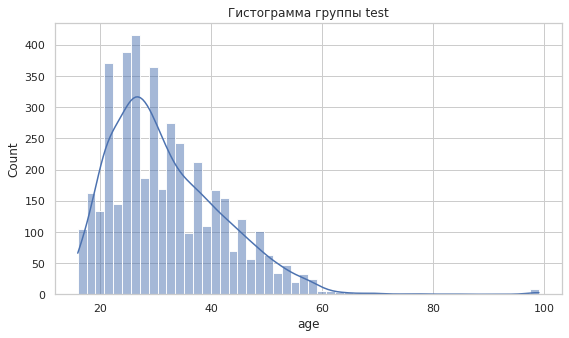

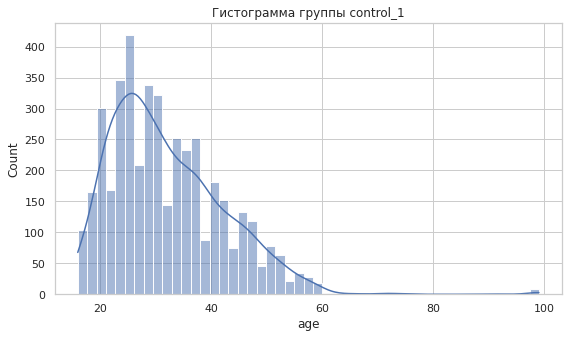

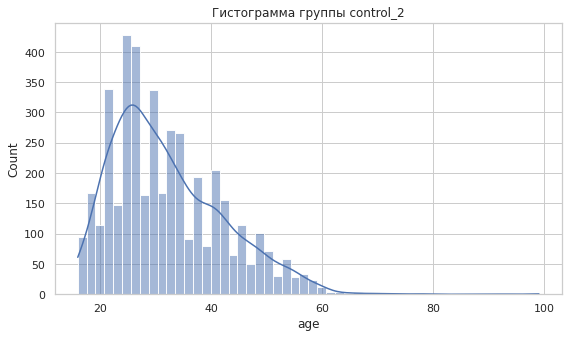

In [181]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['age']
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [182]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['age'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['age'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['age'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=0.400, p=0.670
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [183]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['age'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['age'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['age'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=0.506, p=0.603
Нет статистически значимой разницы между группами (не отвергаем H0)


<h3>4.2. Коэффициент привлекательности</h3>

Данные коэффициента привлекательности количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по коэффициенту привлекательности и построим для наглядности гистограммы.

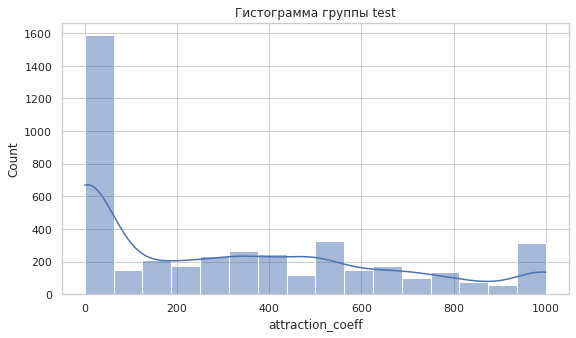

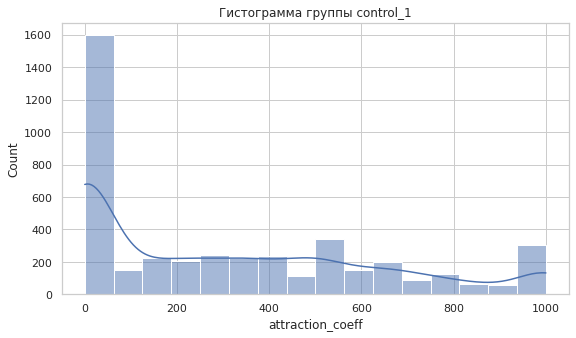

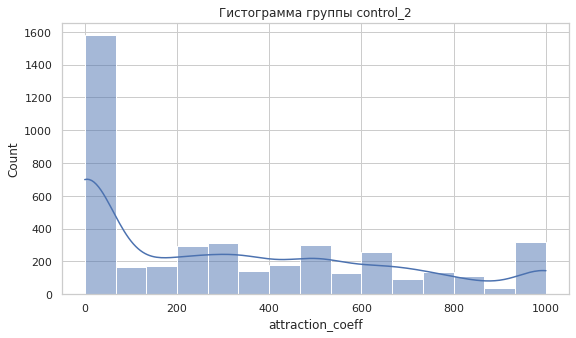

In [184]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['attraction_coeff']
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [185]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['attraction_coeff'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['attraction_coeff'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['attraction_coeff'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=0.766, p=0.465
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [186]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['attraction_coeff'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['attraction_coeff'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['attraction_coeff'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=0.379, p=0.684
Нет статистически значимой разницы между группами (не отвергаем H0)


<h3>4.3. Число монеток (внутренняя валюта)</h3>

Данные коэффициента привлекательности количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по монеткам и построим для наглядности гистограммы.

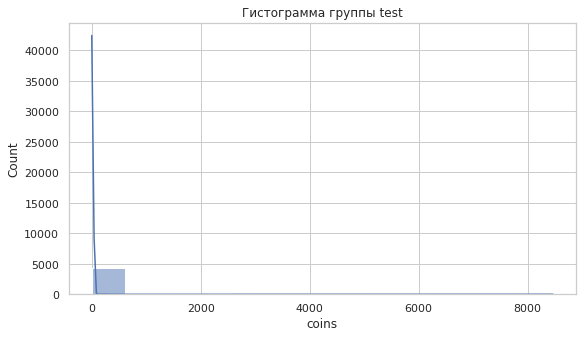

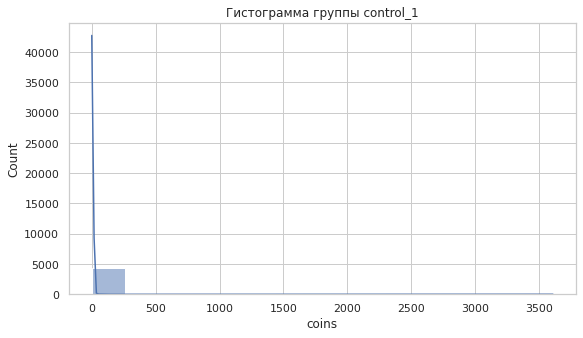

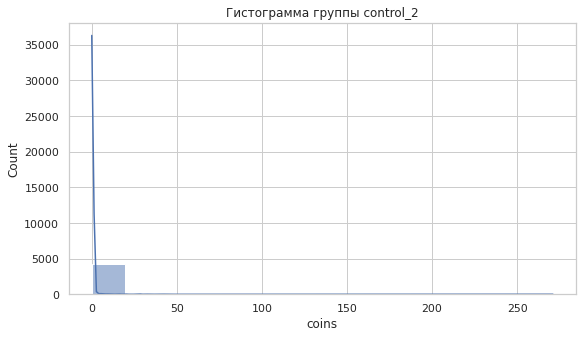

In [187]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['coins']
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [188]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['coins'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['coins'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['coins'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=0.923, p=0.398
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [189]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['coins'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['coins'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['coins'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=0.923, p=0.398
Нет статистически значимой разницы между группами (не отвергаем H0)


<h3>4.4. Страна </h3>

Данные по странам категориальные. Сделаем проверку на наличие различий в распределении категориальных переменных между тремя группами, буду использовать тест хи-квадрат (Chi-squared test).

Предполагаемые гипотезы:

H0: распределение по странам не зависит от группы пользователей.

H1: распределение по странам зависит от группы пользователей.

Для дальнейшей работы сделаем таблицы  сопряженности и проведем тест хи-квадрат. Также сделаем интерпретацию результатов.

In [190]:
cr_table = pd.crosstab(users_all_groups['group'], users_all_groups['country'])
print("Контингентная таблица:")
print(cr_table)

chi2_stat, p_value, dof, expected = stats.chi2_contingency(cr_table)

print(f'\nСтатистика хи-квадрат: {chi2_stat:.3f}')
print(f'p-значение: {p_value:.3f}')
print(f'Степени свободы: {dof}')
print(f'Ожидаемые частоты:\n{expected}')

alpha = 0.05
if p_value < alpha:
    print('Существует статистически значимая разница в распределении по странам по группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы в распределении по странам между группами (не отвергаем H0)')

Контингентная таблица:
country    Algeria  Argentina  Australia  Azerbaijan  Belgium  Bolivia  \
group                                                                    
control_1        2        389         49           0      108        0   
control_2        0        396         50           0       90        0   
test             2        396         62           1       92        1   

country    Brazil  Canada  Chile  Colombia  ...  Switzerland  Tajikistan  \
group                                       ...                            
control_1       0     134    285         1  ...           42           0   
control_2       0     134    284         2  ...           35           1   
test            1     137    272         1  ...           34           2   

country    Tunisia  Turkey  Ukraine  United Arab Emirates  \
group                                                       
control_1        3       8        8                   207   
control_2        0       5       18       

<h3>4.5. Количество дней, проведенное пользователем в приложении</h3>

Для проведения дальнейшего анализа нах стоит добавить столбец с информацией о том, сколько дней пользователь провел в приложении.

In [191]:
users_all_groups.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
group                object
dtype: object

Для удобства переведем столбец vizit_days в тип данных str. Напишем специальную функцию для обработки этого столбца. Дальше сделаем разделение строки и посчитаем количество уникальных дней.

In [192]:
users_all_groups['visit_days'] = users_all_groups['visit_days'].astype('str')

def process_visit_days(visit_days):
    if visit_days == "0":
        return 0  
    else:
        return len(visit_days.split(','))

users_all_groups['days_spent'] = users_all_groups['visit_days'].apply(process_visit_days)

In [193]:
users_all_groups

uid  age  attraction_coeff  coins                         country  \
0     892309896   27               685    0.0        United States of America   
1     892044516   27                 0    0.0                         Germany   
2     892185708   45                44    0.0                          Israel   
3     892130292   32                 0    0.0        United States of America   
4     891406035   27              1000    0.0                          France   
...         ...  ...               ...    ...                             ...   
4259  891937401   63               242    0.0                           Italy   
4260  891692844   35               500    0.0                          France   
4261  891096429   41               333    0.0        United States of America   
4262  891697584   48               210    0.0  United Kingdom (Great Britain)   
4263  891095634   22                 0    0.0                           Italy   

                                             visit_days  gender  \
0                      1,2,3,4,5,6,7,8,9,10,11,12,16,17       1   
1                                                     0       1   
2     1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...       1   
3                            1,2,3,4,5,6,7,8,9,10,11,12       1   
4                                                     0       1   
...                                                 ...     ...   
4259                                                1,2       1   
4260                     1,2,3,4,5,6,8,9,10,11,12,14,16       1   
4261                                                  0       1   
4262                              2,3,5,7,9,10,12,14,15       1   
4263                                                  0       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                   24              30           89          0.0         0.0   
1                   24              30            0          0.0         0.0   
2                   42              48           68          0.0         0.0   
3                   29              35            0          0.0         0.0   
4                   24              30            1          1.0         0.0   
...                ...             ...          ...          ...         ...   
4259                50              66           33          0.0         0.0   
4260                24              45            2          0.0         0.0   
4261                38              44            6          0.0         0.0   
4262                45              51           19          0.0         0.0   
4263                19              25            0          0.0         0.0   

      total_revenue      group  days_spent  
0                 0       test          14  
1                 0       test           0  
2                 0       test          20  
3                 0       test          12  
4                 0       test           0  
...             ...        ...         ...  
4259              0  control_2           2  
4260              0  control_2          13  
4261              0  control_2           0  
4262              0  control_2           9  
4263              0  control_2           0  

[12851 rows x 15 columns]

Данные коэффициента привлекательности количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по количеству проведенных дней в приложении пользователями и построим для наглядности гистограммы.

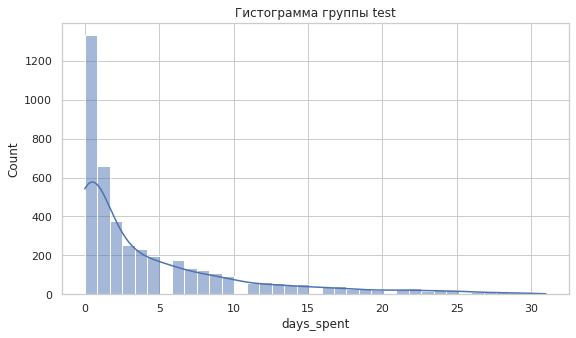

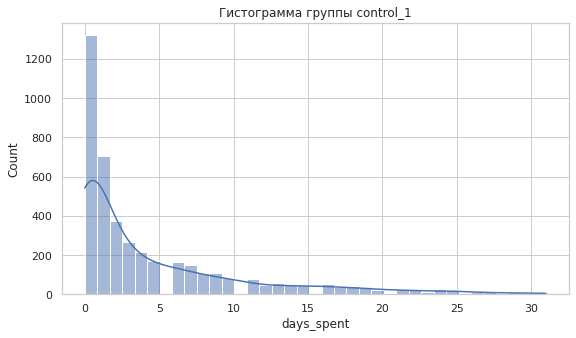

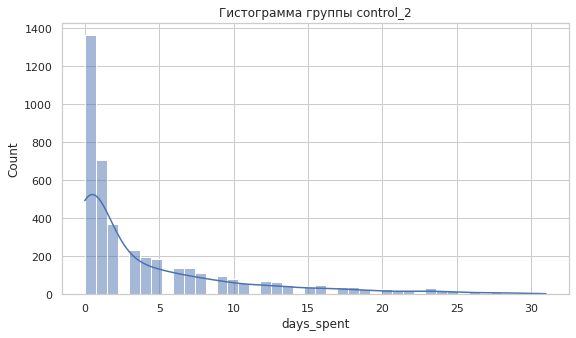

In [194]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['days_spent']
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [195]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['days_spent'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['days_spent'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['days_spent'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=0.662, p=0.516
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [196]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['days_spent'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['days_spent'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['days_spent'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=1.215, p=0.297
Нет статистически значимой разницы между группами (не отвергаем H0)


<h3>4.6. Пол пользователей</h3>

Данные по полу категориальные. Сделаем проверку на наличие различий в распределении категориальных переменных между тремя группами, буду использовать тест хи-квадрат (Chi-squared test).

Предполагаемые гипотезы:

H0: распределение по полу не зависит от группы пользователей.

H1: распределение по полу зависит от группы пользователей.

Необходимо провести подсчет количества пользователей по полу в каждой группе.

In [197]:
gender_distribution = users_all_groups.groupby(['group', 'gender']).size().unstack(fill_value=0)

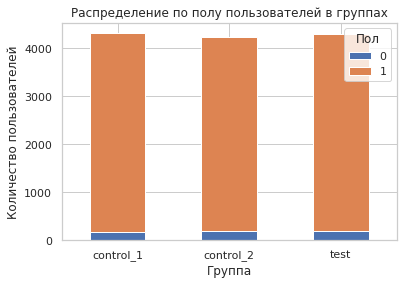

In [198]:
sns.set(style="whitegrid")

gender_distribution.plot(kind='bar', stacked=True)

plt.title('Распределение по полу пользователей в группах')
plt.xlabel('Группа')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0) 
plt.legend(title='Пол')
plt.show()

Для дальнейшего анализа стот создать таблицы сопряженности и провести тест хи-квадрат.

In [199]:
cr_table = pd.crosstab(users_all_groups['group'], users_all_groups['gender'])
print("Контингентная таблица:")
print(cr_table)

chi2_stat, p_value, dof, expected = stats.chi2_contingency(cr_table)

print(f'\nСтатистика хи-квадрат: {chi2_stat:.3f}')
print(f'p-значение: {p_value:.3f}')
print(f'Степени свободы: {dof}')
print(f'Ожидаемые частоты:\n{expected}')

alpha = 0.05
if p_value < alpha:
    print('Существует статистически значимая разница в распределении пола пользователей по группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы в распределении пола пользователей между группами (не отвергаем H0)')

Контингентная таблица:
gender       0     1
group               
control_1  182  4132
control_2  193  4043
test       202  4099

Статистика хи-квадрат: 1.211
p-значение: 0.546
Степени свободы: 2
Ожидаемые частоты:
[[ 193.69527663 4120.30472337]
 [ 190.19313672 4045.80686328]
 [ 193.11158665 4107.88841335]]
Нет статистически значимой разницы в распределении пола пользователей между группами (не отвергаем H0)


<h3>4.7. Фильтр поиска, мин. значение</h3>

Данные фильтра поиска количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по минимальному значению фильтра поиска и построим для наглядности гистограммы.

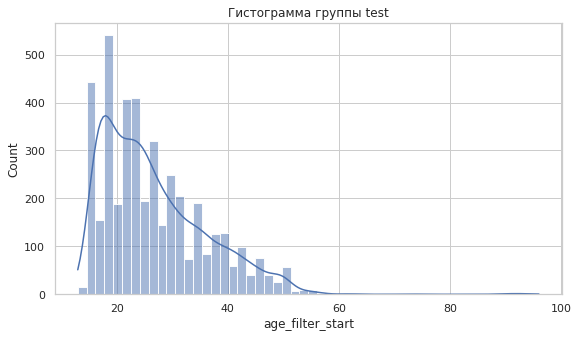

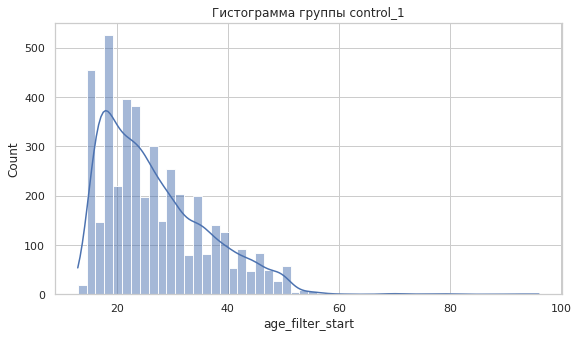

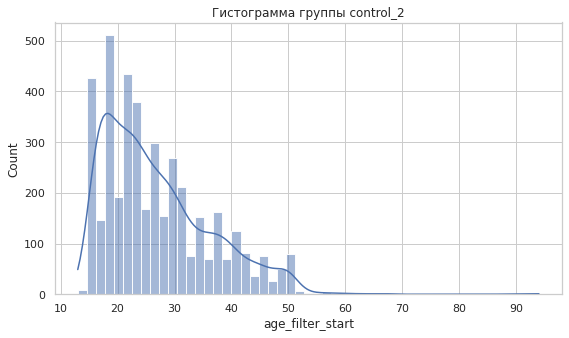

In [200]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['age_filter_start']
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [201]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['age_filter_start'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['age_filter_start'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['age_filter_start'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=0.749, p=0.473
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [202]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['age_filter_start'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['age_filter_start'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['age_filter_start'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=0.824, p=0.439
Нет статистически значимой разницы между группами (не отвергаем H0)


<h3>4.8. Фильтр поиска, макс. значение</h3>

Данные фильтра поиска количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по максимальному значению фильтра поиска и построим для наглядности гистограммы.

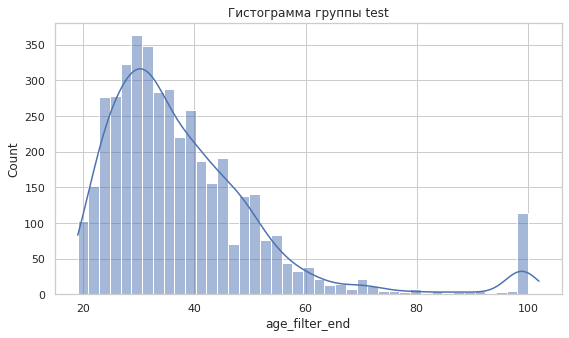

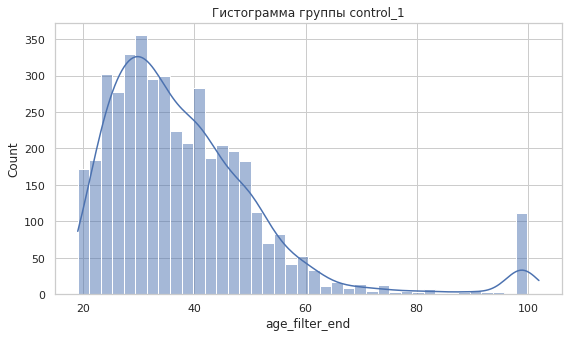

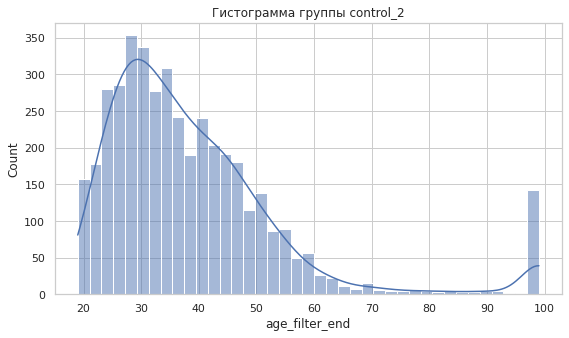

In [203]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['age_filter_end']
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [204]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['age_filter_end'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['age_filter_end'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['age_filter_end'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=1.106, p=0.331
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [205]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['age_filter_end'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['age_filter_end'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['age_filter_end'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=1.906, p=0.149
Нет статистически значимой разницы между группами (не отвергаем H0)


<h3>4.9. Число просмотров</h3>

Данные фильтра поиска количественные, поиск различий по среднему и 3 группы для сравнения. Нужно сделать проверку на удовлетворение парапетрическим условиям: если да, то провести статистический тест ANOVA для проверки равенства средних значений во всех трёх группах.

Предполагаемы гипотезы:
    
H0: Нет различий между выборочными средними в группах.
    
H1: Есть различия хотя бы между двумя группами.

При проведении теста стоит придерживаться определенных требований:
 - Дисперсии внутри каждой из наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Бартлетта и критерия Левена.
 - Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

Гипотезы
 - H0: дисперсии в трёх группах не отличаются.
 - H1: хотя бы одна группа имеет дисперсию отличную от других групп.

Сделаем распределение в группах по числу просмотров и построим для наглядности гистограммы.

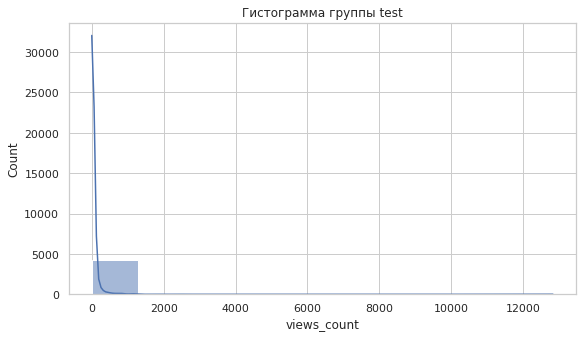

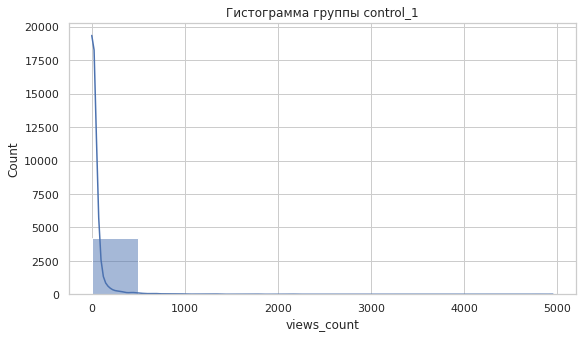

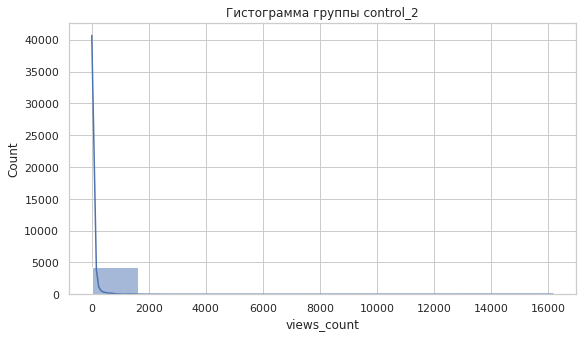

In [206]:
groups = users_all_groups['group'].unique()
for group in groups:
    group_data = users_all_groups[users_all_groups['group'] == group]['views_count']
    
    # Гистограмма
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, bins=10, kde=True)
    plt.title(f'Гистограмма группы {group}')

Будем использовать тест Левена для проверки гомогенности дисперсий. Также сделаем интерпритацию.

In [207]:
stat, p = stats.levene(users_all_groups[users_all_groups['group'] == 'test']['views_count'],
                       users_all_groups[users_all_groups['group'] == 'control_1']['views_count'],
                       users_all_groups[users_all_groups['group'] == 'control_2']['views_count'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=0.867, p=0.420
Дисперсии равны (не отвергаем H0)


Теперь проведем тест ANOVA и интерпритацию.

In [208]:
f_stat, p_value_anova = stats.f_oneway(users_all_groups[users_all_groups['group'] == 'test']['views_count'],
                                       users_all_groups[users_all_groups['group'] == 'control_1']['views_count'],
                                       users_all_groups[users_all_groups['group'] == 'control_2']['views_count'])
print(f'ANOVA: Статистика F={f_stat:.3f}, p={p_value_anova:.3f}')

alpha = 0.05
if p_value_anova < alpha:
    print('Существует статистически значимая разница между группами (отвергаем H0)')
else:
    print('Нет статистически значимой разницы между группами (не отвергаем H0)')

ANOVA: Статистика F=0.866, p=0.421
Нет статистически значимой разницы между группами (не отвергаем H0)


### Вывод

По всем полученным данным в этом разделе можно сделать вывод о том, что система спитования отработала хорошо.  
Мы проверили, что пользователи распредились по свои группам случайно. А также их сравнение не дало статистически значимых различий.

<h2> 5. A/B тестирование</h2>

Сначала нам необходимо определиться с метриками, которые отражают успешность эксперимента.  
Как показатель удачного функционирования компании можно взять прибыльность продукта.   
Для это возьмем метрику - ARPPU (средний дход на платящего пользователя).  
Не стоит забывать о пользователях, которые купили премиум. Для них будем учитывать метрику CR (конверсия пользователя в премиум-подписчики).  
Если в ходе проведения эксперимента эти показатели остались неизменными или снизились, то мы понимаем, что эксперимент оказался неудачным и не стоит применять нововведения для всех пользователей.

### Найдем CR

In [209]:
transactions_test.shape

(257, 8)

In [210]:
transactions_control_1.shape

(325, 8)

In [211]:
transactions_control_2.shape

(303, 8)

Стоит добавить во все таблицы с транзакциями колонку group.  
Потом сделаем объединение всех транзакций в один датафрейм.

In [212]:
transactions_test['group']='test'
transactions_control_1['group']='control_1'
transactions_control_2['group']='control_2'

In [213]:
transactions_all_groups=pd.concat([transactions_test, transactions_control_1, transactions_control_2])
transactions_all_groups.head()

uid                   country           joined_at  \
0  891345942                     Italy 2017-11-05 13:00:00   
1  892054251  United States of America 2017-10-22 00:33:00   
2  892236423  United States of America 2017-10-18 01:09:00   
3  892236423  United States of America 2017-10-18 01:09:00   
4  892168170  United States of America 2017-10-19 17:10:00   

              paid_at  revenue  payment_id        from_page   product_type  \
0 2017-11-13 15:04:00  12909.0       147.0  trial_vip_popup  trial_premium   
1 2017-10-30 01:37:00  13923.0       147.0  trial_vip_popup  trial_premium   
2 2017-10-23 00:15:00   3783.0        67.0             menu     other_type   
3 2017-10-27 22:38:00   3783.0        67.0             menu     other_type   
4 2017-10-27 19:10:00   9087.0       147.0  trial_vip_popup  trial_premium   

  group  
0  test  
1  test  
2  test  
3  test  
4  test

In [214]:
transactions_all_groups.shape

(885, 9)

In [215]:
transactions_all_groups.product_type.value_counts()

coins               318
premium_no_trial    284
trial_premium       181
other_type          102
Name: product_type, dtype: int64

Теперь отфильтруем транзакции и оставим только с премиумом-подиской.  
Потом добавим в данные с пользователями графу premium с категориальными данными: 1 - премиум-подписка, 0 - нет премиум-подписки.  
И сделаем преобразование типа данных.

In [216]:
premium=transactions_all_groups.query('product_type=="premium_no_trial"')

users_all_groups['premium']=users_all_groups['uid'].isin(premium['uid'])

users_all_groups['premium']=users_all_groups['premium'].astype('int')

In [217]:
users_all_groups

uid  age  attraction_coeff  coins                         country  \
0     892309896   27               685    0.0        United States of America   
1     892044516   27                 0    0.0                         Germany   
2     892185708   45                44    0.0                          Israel   
3     892130292   32                 0    0.0        United States of America   
4     891406035   27              1000    0.0                          France   
...         ...  ...               ...    ...                             ...   
4259  891937401   63               242    0.0                           Italy   
4260  891692844   35               500    0.0                          France   
4261  891096429   41               333    0.0        United States of America   
4262  891697584   48               210    0.0  United Kingdom (Great Britain)   
4263  891095634   22                 0    0.0                           Italy   

                                             visit_days  gender  \
0                      1,2,3,4,5,6,7,8,9,10,11,12,16,17       1   
1                                                     0       1   
2     1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...       1   
3                            1,2,3,4,5,6,7,8,9,10,11,12       1   
4                                                     0       1   
...                                                 ...     ...   
4259                                                1,2       1   
4260                     1,2,3,4,5,6,8,9,10,11,12,14,16       1   
4261                                                  0       1   
4262                              2,3,5,7,9,10,12,14,15       1   
4263                                                  0       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                   24              30           89          0.0         0.0   
1                   24              30            0          0.0         0.0   
2                   42              48           68          0.0         0.0   
3                   29              35            0          0.0         0.0   
4                   24              30            1          1.0         0.0   
...                ...             ...          ...          ...         ...   
4259                50              66           33          0.0         0.0   
4260                24              45            2          0.0         0.0   
4261                38              44            6          0.0         0.0   
4262                45              51           19          0.0         0.0   
4263                19              25            0          0.0         0.0   

      total_revenue      group  days_spent  premium  
0                 0       test          14        0  
1                 0       test           0        0  
2                 0       test          20        0  
3                 0       test          12        0  
4                 0       test           0        0  
...             ...        ...         ...      ...  
4259              0  control_2           2        0  
4260              0  control_2          13        0  
4261              0  control_2           0        0  
4262              0  control_2           9        0  
4263              0  control_2           0        0  

[12851 rows x 16 columns]

In [218]:
data_for_CR_users=users_all_groups.groupby('group', as_index=False)\
                                  .agg({'uid':'nunique'})\
                                  .rename(columns={'uid':'users'})
data_for_CR_users

group  users
0  control_1   4314
1  control_2   4236
2       test   4301

In [219]:
data_for_CR_users_pr=users_all_groups.query('premium==1')\
                                     .groupby('group', as_index=False)\
                                     .agg({'uid':'nunique'})\
                                     .rename(columns={'uid':'users_with_premium'})
data_for_CR_users_pr

group  users_with_premium
0  control_1                  97
1  control_2                 100
2       test                  66

In [220]:
data_for_CR=pd.merge(data_for_CR_users, data_for_CR_users_pr, on='group')
data_for_CR

group  users  users_with_premium
0  control_1   4314                  97
1  control_2   4236                 100
2       test   4301                  66

In [221]:
data_for_CR['CR']=(data_for_CR.users_with_premium/data_for_CR.users).round(4)
data_for_CR

group  users  users_with_premium      CR
0  control_1   4314                  97  0.0225
1  control_2   4236                 100  0.0236
2       test   4301                  66  0.0153

По полученным данным можно отметить, что конверсия в пользователей с премиум-подпиской снизалась.  
Стоит проверить еще с помощью статистики.

Для этого оставим пользователей только из контрольных групп.

In [222]:
users_control_groups=users_all_groups.query('group=="control_1" | group=="control_2"')
users_control_groups

uid  age  attraction_coeff  coins                         country  \
0     892319115   25               435    0.0        United States of America   
1     891248523   29               500    0.0        United States of America   
2     891670932   33               800    0.0                          France   
3     891060786   26                 0    0.0                       Argentina   
4     892006554   35               294    0.0        United States of America   
...         ...  ...               ...    ...                             ...   
4259  891937401   63               242    0.0                           Italy   
4260  891692844   35               500    0.0                          France   
4261  891096429   41               333    0.0        United States of America   
4262  891697584   48               210    0.0  United Kingdom (Great Britain)   
4263  891095634   22                 0    0.0                           Italy   

                             visit_days  gender  age_filter_start  \
0                           1,2,3,4,5,6       0                22   
1                                   1,2       1                26   
2                1,2,3,5,6,8,9,11,13,16       1                30   
3                             1,2,3,4,5       1                23   
4     1,2,3,5,6,7,8,9,10,12,15,16,17,19       1                30   
...                                 ...     ...               ...   
4259                                1,2       1                50   
4260     1,2,3,4,5,6,8,9,10,11,12,14,16       1                24   
4261                                  0       1                38   
4262              2,3,5,7,9,10,12,14,15       1                45   
4263                                  0       1                19   

      age_filter_end  views_count  was_premium  is_premium  total_revenue  \
0                 32          982          0.0         0.0              0   
1                 32           12          0.0         0.0              0   
2                 36            5          0.0         0.0              0   
3                 29            0          0.0         0.0              0   
4                 40           17          0.0         0.0              0   
...              ...          ...          ...         ...            ...   
4259              66           33          0.0         0.0              0   
4260              45            2          0.0         0.0              0   
4261              44            6          0.0         0.0              0   
4262              51           19          0.0         0.0              0   
4263              25            0          0.0         0.0              0   

          group  days_spent  premium  
0     control_1           6        0  
1     control_1           2        0  
2     control_1          10        0  
3     control_1           5        0  
4     control_1          14        0  
...         ...         ...      ...  
4259  control_2           2        0  
4260  control_2          13        0  
4261  control_2           0        0  
4262  control_2           9        0  
4263  control_2           0        0  

[8550 rows x 16 columns]

Предполагаемые гипотезы:

H0: соотношение числа пользователей с премиумом с общим числом пользователей в контрольных группах равны.

H1: соотношение числа пользователей с премиумом с общим числом пользователей в контрольных группах не равны.

Создадим таблицы сопряженности и проведем тест хи-квадрат.

In [223]:
cr_table = pd.crosstab(users_control_groups['group'], users_control_groups['premium'])
cr_table

premium       0    1
group               
control_1  4217   97
control_2  4136  100

In [224]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cr_table)

print(f'\nСтатистика хи-квадрат: {chi2_stat:.3f}')
print(f'p-значение: {p_value:.3f}')
print(f'Степени свободы: {dof}')
print(f'Ожидаемые частоты:\n{expected}')

alpha = 0.05
if p_value < alpha:
    print('Существует статистически значимая разница в соотношение числа пользователей с премиумом с общим числом пользователей в контрольных группах  (отвергаем H0)')
else:
    print('Нет статистически значимой разницы в соотношение числа пользователей с премиумом с общим числом пользователей в контрольных группах (не отвергаем H0)')


Статистика хи-квадрат: 0.075
p-значение: 0.784
Степени свободы: 1
Ожидаемые частоты:
[[4214.60140351   99.39859649]
 [4138.39859649   97.60140351]]
Нет статистически значимой разницы в соотношение числа пользователей с премиумом с общим числом пользователей в контрольных группах (не отвергаем H0)


Теперь оставим только пользователей из тестовой и первой контрольной групп.

In [225]:
users_control_1_test_groups=users_all_groups.query('group=="control_1" | group=="test"')
users_control_1_test_groups

uid  age  attraction_coeff  coins                   country  \
0     892309896   27               685    0.0  United States of America   
1     892044516   27                 0    0.0                   Germany   
2     892185708   45                44    0.0                    Israel   
3     892130292   32                 0    0.0  United States of America   
4     891406035   27              1000    0.0                    France   
...         ...  ...               ...    ...                       ...   
4335  892022304   26               227    0.0  United States of America   
4336  891905022   38               200    0.0                 Argentina   
4337  891304722   49               411    0.0  United States of America   
4338  891302328   27                 0    0.0  United States of America   
4339  891182532   31              1000    0.0  United States of America   

                                             visit_days  gender  \
0                      1,2,3,4,5,6,7,8,9,10,11,12,16,17       1   
1                                                     0       1   
2     1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...       1   
3                            1,2,3,4,5,6,7,8,9,10,11,12       1   
4                                                     0       1   
...                                                 ...     ...   
4335                                                  0       0   
4336             1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21       1   
4337                                                  1       1   
4338                                              1,3,5       1   
4339                                                  1       1   

      age_filter_start  age_filter_end  views_count  was_premium  is_premium  \
0                   24              30           89          0.0         0.0   
1                   24              30            0          0.0         0.0   
2                   42              48           68          0.0         0.0   
3                   29              35            0          0.0         0.0   
4                   24              30            1          1.0         0.0   
...                ...             ...          ...          ...         ...   
4335                23              29          427          0.0         0.0   
4336                20              50            5          0.0         0.0   
4337                46              52           17          0.0         0.0   
4338                24              30            0          0.0         0.0   
4339                19              34            2          0.0         0.0   

      total_revenue      group  days_spent  premium  
0                 0       test          14        0  
1                 0       test           0        0  
2                 0       test          20        0  
3                 0       test          12        0  
4                 0       test           0        0  
...             ...        ...         ...      ...  
4335              0  control_1           0        0  
4336              0  control_1          16        0  
4337              0  control_1           1        0  
4338              0  control_1           3        0  
4339              0  control_1           1        0  

[8615 rows x 16 columns]

Предполагаемые гипотезы:

H0: соотношение числа пользователей с премиумом с общим числом пользователей в тестовой и контрольных группах равны.

H1: соотношение числа пользователей с премиумом с общим числом пользователей в тестовой и контрольных группах не равны.

Создадим таблицы сопряженности и проведем тест хи-квадрат.

In [226]:
cr_table_2 = pd.crosstab(users_control_1_test_groups['group'], users_control_1_test_groups['premium'])
cr_table_2

premium       0   1
group              
control_1  4217  97
test       4235  66

In [227]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cr_table_2)

print(f'\nСтатистика хи-квадрат: {chi2_stat:.3f}')
print(f'p-значение: {p_value:.3f}')
print(f'Степени свободы: {dof}')
print(f'Ожидаемые частоты:\n{expected}')

alpha = 0.05
if p_value < alpha:
    print('Существует статистически значимая разница в соотношение числа пользователей с премиумом с общим числом пользователей в тестовой и контрольных группах  (отвергаем H0)')
else:
    print('Нет статистически значимой разницы в соотношение числа пользователей с премиумом с общим числом пользователей в тестовой и контрольных группах (не отвергаем H0)')


Статистика хи-квадрат: 5.536
p-значение: 0.019
Степени свободы: 1
Ожидаемые частоты:
[[4232.37701683   81.62298317]
 [4219.62298317   81.37701683]]
Существует статистически значимая разница в соотношение числа пользователей с премиумом с общим числом пользователей в тестовой и контрольных группах  (отвергаем H0)


### Конверсия в пользователей с премиум-подпиской статистически значимо снизилась в тестовой группе. Принимаем альтернативную гипотезу.

### Найдем ARPPU

In [228]:
premium

uid                         country           joined_at  \
5    892426491        United States of America 2017-10-14 10:13:00   
6    891558921        United States of America 2017-11-01 03:07:00   
11   891861048                          Canada 2017-10-26 02:55:00   
12   891178380                           Spain 2017-11-08 03:54:00   
21   891312873                           Italy 2017-11-05 21:22:00   
..         ...                             ...                 ...   
316  891393735                           Spain 2017-11-04 17:31:00   
317  892053750        United States of America 2017-10-22 00:46:00   
320  892032072  United Kingdom (Great Britain) 2017-10-22 14:21:00   
322  891435993                          Canada 2017-11-03 21:08:00   
327  891459291                           Spain 2017-11-03 11:43:00   

                paid_at   revenue  payment_id          from_page  \
5   2017-10-15 22:39:00   12597.0       147.0  autoreply_message   
6   2017-11-10 09:05:00    9100.0       147.0  left_sidebar_menu   
11  2017-11-10 19:00:00    3588.0        68.0               none   
12  2017-11-09 21:53:00  113477.0       147.0           promo_09   
21  2017-11-10 21:51:00    7852.0       147.0           promo_09   
..                  ...       ...         ...                ...   
316 2017-11-04 18:05:00    6292.0       147.0             dating   
317 2017-10-28 08:12:00    6292.0       147.0  autoreply_message   
320 2017-10-23 15:37:00    3588.0        68.0               none   
322 2017-11-03 21:26:00    3549.0        68.0               none   
327 2017-11-03 11:57:00    6292.0       147.0  autoreply_message   

         product_type      group  
5    premium_no_trial       test  
6    premium_no_trial       test  
11   premium_no_trial       test  
12   premium_no_trial       test  
21   premium_no_trial       test  
..                ...        ...  
316  premium_no_trial  control_2  
317  premium_no_trial  control_2  
320  premium_no_trial  control_2  
322  premium_no_trial  control_2  
327  premium_no_trial  control_2  

[284 rows x 9 columns]

Рассчитаем общий доход от платящих пользователей.

In [229]:
total_revenue_premium = premium.groupby('group', as_index=False)\
                             .agg({'revenue':'sum', 'uid':'nunique'})\
                             .rename(columns={'revenue':'total_revenue', 'uid':'number_of_paying_users'})
total_revenue_premium

group  total_revenue  number_of_paying_users
0  control_1       766545.0                      99
1  control_2       736034.0                     101
2       test       801489.0                      67

In [230]:
total_revenue_premium['ARPPU'] = (total_revenue_premium.total_revenue/total_revenue_premium.number_of_paying_users).round(2)
total_revenue_premium

group  total_revenue  number_of_paying_users     ARPPU
0  control_1       766545.0                      99   7742.88
1  control_2       736034.0                     101   7287.47
2       test       801489.0                      67  11962.52

По полученным данным ми видим, что средний доход платящего пользователя увеличился в тестовой группе.

Дальше для сравнения будет использоваться или t-test или U-тест Манна-Уитни (данные количественные, тип вопроса поиск различий средних, 2 группы для сравнения: 2 контрольные между собой и контрольная+тест). Для определения теста, который будет использоваться нужно проверить, что данные в группах распределены нормально и имеют одинаковую дисперсию.   

In [231]:
data_premium_users_groups = premium.groupby(['group','uid'], as_index=False)\
                                 .agg({'revenue':'sum'})
data_premium_users_groups

group        uid  revenue
0    control_1  891092322   5278.0
1    control_1  891120969   6292.0
2    control_1  891130164   4537.0
3    control_1  891131061   6292.0
4    control_1  891142386   4680.0
..         ...        ...      ...
262       test  892370097  11115.0
263       test  892390170   5369.0
264       test  892405179   9100.0
265       test  892426491  12597.0
266       test  892434141   3614.0

[267 rows x 3 columns]

Для наглядности построим график.

Text(0, 0.5, 'Частота')

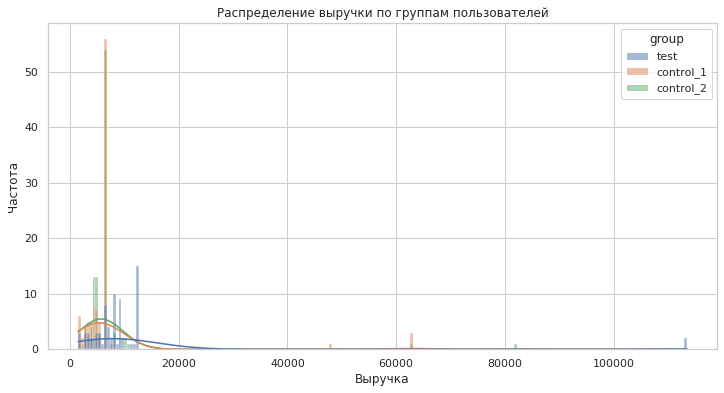

In [232]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(data = premium, x="revenue", hue="group", kde=True)
plt.title('Распределение выручки по группам пользователей')
plt.xlabel('Выручка')
plt.ylabel('Частота')

Предполагаемые гипотезы:

H0: Данные распределены нормально.

H1: Распределение данных отклоняется от нормального.

Если pvalue<0.05, данные распределены не нормально, нулевая гипотеза отвергается.

In [233]:
premium_control_1=premium.query('group=="control_1"')

In [234]:
premium_control_2=premium.query('group=="control_2"')

In [235]:
premium_test=premium.query('group=="test"')

In [236]:
stats.shapiro(premium_control_1.revenue)

ShapiroResult(statistic=0.2985817790031433, pvalue=4.6688506846716524e-20)

In [237]:
stats.shapiro(premium_control_2.revenue)

ShapiroResult(statistic=0.2335934042930603, pvalue=6.037307755482551e-21)

In [238]:
stats.shapiro(premium_test.revenue)

ShapiroResult(statistic=0.2978513836860657, pvalue=3.562410472275999e-17)

По полученным данным мы видим, что они распределены не нормально во всех группах.  
Поскольку нам нужно сравнить ARPPU (явл. ср. арифметическим) будет использоваться t-test.

Предполагаемые гипотезы:

H0: Дисперсии во всех трёх группах равны.

H1:  Хотя бы одна группа имеет дисперсию отличную от друх групп. 

Будем использовать тест Левена для проверки гомогенности дисперсий.

In [239]:
stat, p = stats.levene(premium[premium['group'] == 'test']['revenue'],
                       premium[premium['group'] == 'control_1']['revenue'],
                       premium[premium['group'] == 'control_2']['revenue'])
print(f'Тест Левене: Статистика={stat:.3f}, p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H0)')
else:
    print('Дисперсии не равны (отвергаем H0)')

Тест Левене: Статистика=1.504, p=0.224
Дисперсии равны (не отвергаем H0)


Теперь проведем t-test между двумя контрольными группами.

Предполагаемые гипотезы: 

H0: статистически значимого различия средних значений ARPPU в контрольных группах нет.

H1: есть статистически значимое различие средних значений ARPPU в контрольных группах.

In [240]:
stat_ttest, p_ttest = ss.ttest_ind(premium_control_1.revenue, premium_control_2.revenue)

print(f"Статистика t-теста: {stat_ttest}, P-значение: {p_ttest}")

alpha = 0.05
if p_ttest < alpha:
    print("Отвергаем нулевую гипотезу: средние значения групп различны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения групп не различны.")

Статистика t-теста: 0.26067813326542766, P-значение: 0.7945998695199628
Не можем отвергнуть нулевую гипотезу: средние значения групп не различны.


Теперь проведем t-test между контрольной группой и тестовой группой.

Предполагаемые гипотезы:

H0: статистически значимого различия средних значений ARPPU в контрольной и тестовой группах нет.

H1: есть статистически значимое различие средних значений ARPPU в контрольной и тестовой группах.

In [241]:
stat_ttest, p_ttest = ss.ttest_ind(premium_control_1.revenue, premium_test.revenue)

print(f"Статистика t-теста: {stat_ttest}, P-значение: {p_ttest}")

alpha = 0.05
if p_ttest < alpha:
    print("Отвергаем нулевую гипотезу: средние значения групп различны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения групп не различны.")

Статистика t-теста: -1.5784110595537584, P-значение: 0.11625669460441285
Не можем отвергнуть нулевую гипотезу: средние значения групп не различны.


По всем полученным данным видим, что ARPPU статистически значимо не изменился.  
Не принимаем эту альтернативную гипотезу.

## 6. Вывод

По проведенному A/B-тесту было выявлено, что эксперимент не увенчался успехом и нам не стоитизменять стоимость премиум-подписки.  
Увидели, что конверсия пользователя в премиум-подписчика статистически значимо снизалась. При этом средний доход с платящего пользователя статистически значимо не изменился.